In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [2]:
import tensorflow as tf
print (tf.__version__)
print (tf.config.list_physical_devices())

2.6.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
import bisect
import datetime as dt
import functools
import glob
#import keras
import math
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import more_itertools as mit
import networkx as nx
import numpy as np
import operator
import os
import pandas as pd
import pickle
import random
import re
import scipy.stats
import seaborn as sns
import shutil
import statsmodels as sm
import time
import torch
import torch.utils.data
import warnings
import xgboost as xgb
from datetime import date, timedelta, datetime
from tensorflow import keras
from itertools import chain, permutations
#import tensorflow as tf
# from tensorflow.keras import optimizers
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
# from tensorflow.keras.models import Sequential, load_model
# from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
from numpy import loadtxt, matrix
from random import randint
from scipy import stats
from scipy.stats import ks_2samp
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils.extmath import cartesian
from statsmodels.distributions.empirical_distribution import ECDF
#from tensorflow.keras.layers import Activation
#from keras import backend as K
#from keras.callbacks import LambdaCallback
#from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from time import time, strftime, gmtime
# from torch_geometric.data import Data, DataLoader, InMemoryDataset
# from torch_geometric.data import InMemoryDataset
# from torch_geometric.datasets import Reddit
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 5000)

# Read and prepare data

In [4]:
df = pd.read_csv("D:\\Amir_Nohekhan\\2020_data_11_22.csv", delimiter=',' ,dtype={'pair':'object',
'measurement_tstamp' : 'object',
'hour' : 'int64',
'quarter' : 'int64',
'year' : 'int64',
'month' : 'int64',
'weekday' : 'int64',
'day' : 'int64',
'Up' : 'int64',
'Dn' : 'int64',
'Detector_ID' : 'int64',
'Direction' : 'object',
'Exclusive_Lane' : 'int64',
'roadname_up' : 'object',
'xd_up' : 'int64',
'tmc_up' : 'object',
'lanes_up' : 'int64',
'roadname_dn' : 'object',
'xd_dn' : 'int64',
'tmc_dn' : 'object',
'lanes_dn' : 'int64',
'speed_up' : 'float64',
'avg_speed_up' : 'float64',
'ref_speed_up' : 'float64',
'speed_dn' : 'float64',
'avg_speed_dn' : 'float64',
'ref_speed_dn' : 'float64',
'Intersection Name' : 'object',
'l_veh' : 'float64',
'up_dir' : 'object',
'move' : 'object',
'h_veh' : 'float64',
'movements' : 'int64',
'dn_dir' : 'object',
'tmcount' : 'float64',
'up_vol' : 'float64',
'dn_vol' : 'float64',
'time' : 'float64',
'aadt_up' : 'int64',
'aadt_dn' : 'int64'
})

# db = pd.read_csv("D:\\Amir_Nohekhan\\2020_xd_11_22.csv", delimiter=',' ,dtype={'measurement_tstamp' : 'object',
# 'hour' : 'int64',
# 'quarter' : 'int64',
# 'year' : 'int64',
# 'month' : 'int64',
# 'weekday' : 'int64',
# 'day' : 'int64',
# 'xd' : 'int64',
# 'Detector_ID' : 'int64',
# 'lanes' : 'int64',
# 'speed' : 'float64',
# 'avg_speed' : 'float64',
# 'ref_speed' : 'float64',
# 'dir' : 'object',
# 'vol' : 'float64',
# 'time' : 'float64',
# 'aadt' : 'int64'})

In [5]:

dg = pd.read_csv("D:\\Amir_Nohekhan\\2019_data_10_26.csv", delimiter=',' ,dtype={'pair':'object',
'measurement_tstamp' : 'object',
'hour' : 'int64',
'quarter' : 'int64',
'year' : 'int64',
'month' : 'int64',
'weekday' : 'int64',
'day' : 'int64',
'Up' : 'int64',
'Dn' : 'int64',
'Detector_ID' : 'int64',
'Direction' : 'object',
'Exclusive_Lane' : 'int64',
'roadname_up' : 'object',
'xd_up' : 'int64',
'tmc_up' : 'object',
'lanes_up' : 'int64',
'roadname_dn' : 'object',
'xd_dn' : 'int64',
'tmc_dn' : 'object',
'lanes_dn' : 'int64',
'speed_up' : 'float64',
'avg_speed_up' : 'float64',
'ref_speed_up' : 'float64',
'speed_dn' : 'float64',
'avg_speed_dn' : 'float64',
'ref_speed_dn' : 'float64',
'Intersection Name' : 'object',
'l_veh' : 'float64',
'up_dir' : 'object',
'move' : 'object',
'h_veh' : 'float64',
'movements' : 'int64',
'dn_dir' : 'object',
'tmcount' : 'float64',
'up_vol' : 'float64',
'dn_vol' : 'float64',
'time' : 'float64',
'aadt_up' : 'int64',
'aadt_dn' : 'int64'
})

In [6]:
# db = db.rename(columns={'XD':'xd'})
# # not in probe intersections : 6355,7133,6177,6181,6331
# #det_list = [6331,6788,6355,7133,6177,6181,6192] #2020
# #det_list = [6164,6541,6653,6788,6789,6814,6840,7080, 7133, 7273] #2019
# #det_list = [6192,6212,6174,7038,6199,6882,7047,6351,6354,6353,6171,6331,6197,6549] #2019 new
# det_list = [6212,7038,6174,7080,6199,7273,6882,6351,6653,6354,7047,6353,6171,6549,6197] #2020 new
# #det_list = [6164,6541,7080,7133,7273]
# #det_list = [6164,6541,7080,7133,7273,6653,6788,6789,6814,6840,6192,6177]
# #det_list = [6331,6788]
# # det_list = [6164,6541,7080,7133,7273,6164, 6171, 6174, 6177, 6181, 6192, 6197, 6199, 6212, 6331, 6351,
# #             6353, 6354, 6355, 6541, 6549, 6653, 6788, 6789, 6814, 6840, 6882]
# df = df.loc[df['Detector_ID'].isin(det_list)].reset_index(drop=True)
# db = db.loc[db['Detector_ID'].isin(det_list)].reset_index(drop=True)
# # df = df.loc[df['year']==2020].reset_index(drop=True)
# # db = db.loc[db['year']==2020].reset_index(drop=True)
# df = df.loc[(df['time']>7)&(df['time']<19.25)]
# db = db.loc[(db['time']>7)&(db['time']<19.25)]

# df['actual_pro'] = df['tmcount']/df['vol_up']
# df.loc[df['p_vol_up']==0,'p_vol_up'] = 0.001
# df.loc[df['p_vol_dn']==0,'p_vol_dn'] = 0.001
# df['p_pro_up'] = df['p_tmcount']/(df['p_vol_up'])
# df['p_pro_dn'] = df['p_tmcount']/(df['p_vol_dn'])


In [7]:
det_list = [6212,7038,6174,7080,6199,7273,6882,6351,6653,6354,7047,6353,6171,6549,6197] #2020 new

df = df.loc[df['Detector_ID'].isin(det_list)].reset_index(drop=True)

df = df.loc[(df['time']>7)&(df['time']<19.25)]

df['actual_pro'] = df['tmcount']/df['vol_up']
df.loc[df['p_vol_up']==0,'p_vol_up'] = 0.001
df.loc[df['p_vol_dn']==0,'p_vol_dn'] = 0.001
df['p_pro_up'] = df['p_tmcount']/(df['p_vol_up'])
df['p_pro_dn'] = df['p_tmcount']/(df['p_vol_dn'])


In [8]:
det_list = [6192,6212,6174,7038,6199,6882,7047,6351,6354,6353,6171,6331,6197,6549] #2019 new

dg = dg.loc[dg['Detector_ID'].isin(det_list)].reset_index(drop=True)

dg = dg.loc[(dg['time']>7)&(dg['time']<19.25)]

dg['actual_pro'] = dg['tmcount']/dg['vol_up']

In [ ]:
import glob
import pandas as pd

tm_performance = pd.DataFrame()
for file_name in glob.glob("D:\\Amir_Nohekhan\\Results_Dec\\"+'*.csv'):
    x = pd.read_csv(file_name, low_memory=False)
    tm_performance = pd.concat([tm_performance,x],axis=0)
tm_performance = tm_performance.reset_index().drop(['index','Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Iteration'],axis=1)
tm_performance['code'] = tm_performance['vol'].astype(str) + tm_performance['probe'].astype(str)
tm_performance['Detector_ID'] = tm_performance['Detector_ID'].astype(int)

In [ ]:
tm_performance

In [ ]:
tm_performance.loc[tm_performance['vol']==1].sort_values(by=['Detector_ID','Validation_MAPE'],ascending=[False,False]).drop_duplicates(subset=['Detector_ID'])

In [ ]:
sns.boxplot(x="code", y="Validation_MAPE", data=tm_performance.loc[tm_performance['Detector_ID']==6164])
plt.show()

In [ ]:
sns.boxplot(x="code", y="Validation_MAE", data=tm_performance)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x="Detector_ID", y="Validation_MAPE", data=tm_performance.loc[tm_performance['vol']==1])
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x="Detector_ID", y="Validation_MAE", data=tm_performance.loc[tm_performance['code']=='11'])
plt.show()

In [ ]:
import glob
import pandas as pd

tm_performance = pd.DataFrame()
for file_name in glob.glob("D:\\Amir_Nohekhan\\Results_Dec\\2019\\"+'*.csv'):
    x = pd.read_csv(file_name, low_memory=False)
    tm_performance = pd.concat([tm_performance,x],axis=0)
tm_performance = tm_performance.reset_index().drop(['index','Unnamed: 0','Unnamed: 0.1','Iteration'],axis=1)
tm_performance['Detector_ID'] = tm_performance['Detector_ID'].astype(int)

In [ ]:
tm_performance.to_csv("D:\\Amir_Nohekhan\\Results_Dec\\tm_performance_2019.csv", sep=',')

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x="Detector_ID", y="Validation_MAPE", data=tm_performance.loc[(tm_performance['vol']==1)&(tm_performance['Detector_ID']!=6171)&
                                                                          (tm_performance['Detector_ID']!=6177)&(tm_performance['Detector_ID']!=6192)])
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x="Detector_ID", y="Validation_MAPE", data=tm_performance.loc[(tm_performance['vol']==1)&(tm_performance['Detector_ID']!=6171)&
                                                                          &(tm_performance['Detector_ID']!=6177)&(tm_performance['Detector_ID']!=6192)])
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x="Detector_ID", y="Validation_MAPE", data=tm_performance.loc[tm_performance['vol']==1])
plt.show()

In [ ]:
df.loc[(df['vol_up'].notna())&(df['vol_dn'].notna())&(df['tm_set']!=1)]

In [ ]:
df['ape'] = abs(df['tmcount']-df['tm_pred'])/(df['tmcount'])*100
df['ae'] = abs(df['tmcount']-df['tm_pred'])


In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x="Detector_ID", y="ape", data=df.loc[(df['ape'].notna())&(df['ape'].notna())&(df['move']=='TH')],showfliers=False)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x="Detector_ID", y="ape", data=df.loc[(df['ape'].notna())&(df['ape'].notna())&(df['move']=='LT')],showfliers=False)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x="Detector_ID", y="ape", data=df.loc[(df['ape'].notna())&(df['ape'].notna())&(df['move']=='RT')],showfliers=False)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.displot(x="tmcount", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='LT')],binwidth=5,ax=ax)
plt.show()

In [ ]:
df.head()

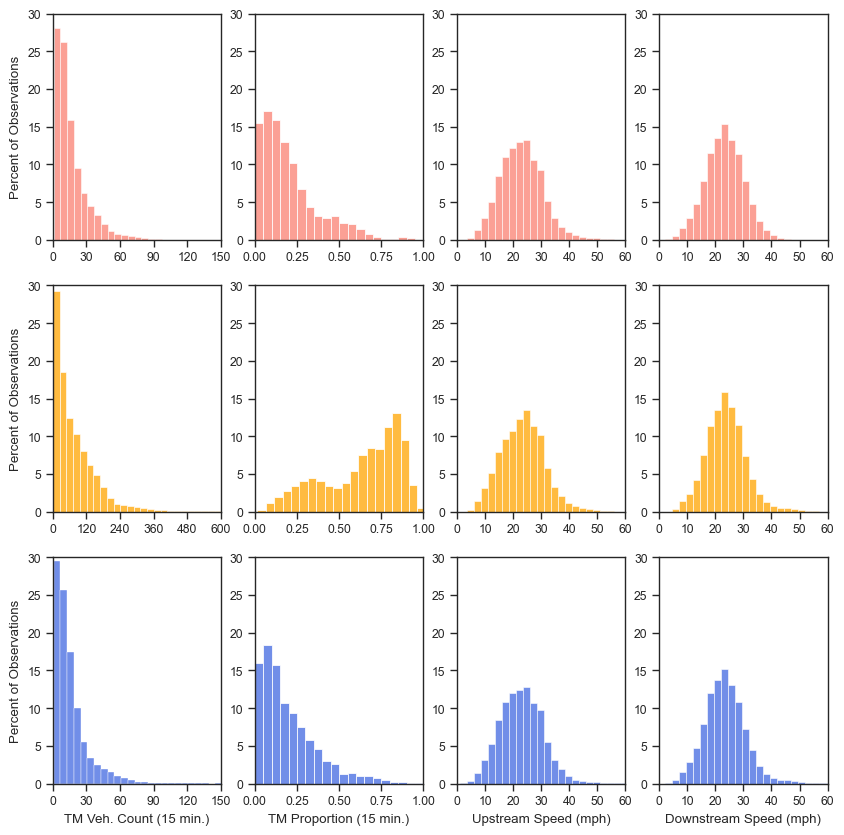

In [8]:
sns.set(rc={"figure.figsize":(10, 10)})
sns.set_style("ticks")
sns.set_context("paper")
fig, axes = plt.subplots(3,4)



sns.histplot(x="tmcount", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='LT')&(df['vol_up'].notna())&
                                        (df['vol_dn'].notna())], stat='percent', binwidth=6,ax=axes[0,0],color='salmon')
axes[0,0].set_xlim(0,150)
axes[0,0].set_ylim(0,30)
axes[0,0].set_xticks([i for i in range(0,151,30)])
axes[0,0].set_xlabel(None)
axes[0,0].set_ylabel("Percent of Observations")

sns.histplot(x="tmcount", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='TH')&(df['vol_up'].notna())&
                                        (df['vol_dn'].notna())], stat='percent',binwidth=24,ax=axes[1,0],color='orange')
axes[1,0].set_xlim(0,600)
axes[1,0].set_ylim(0,30)
axes[1,0].set_xticks([i for i in range(0,601,120)])
axes[1,0].set_xlabel(None)
axes[1,0].set_ylabel("Percent of Observations")

sns.histplot(x="tmcount", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='RT')&(df['vol_up'].notna())&
                                        (df['vol_dn'].notna())], stat='percent',binwidth=6,ax=axes[2,0],color='royalblue')
axes[2,0].set_xlim(0,150)
axes[2,0].set_ylim(0,30)
axes[2,0].set_xticks([i for i in range(0,161,30)])
axes[2,0].set_xlabel("TM Veh. Count (15 min.)")
axes[2,0].set_ylabel("Percent of Observations")


sns.histplot(x="actual_pro", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='LT')&(df['vol_up'].notna())&
                                           (df['vol_dn'].notna())], stat='percent',binwidth=0.05,ax=axes[0,1],color='salmon')
axes[0,1].set_xlim(0,1)
axes[0,1].set_ylim(0,30)
axes[0,1].set_xlabel(None)
axes[0,1].set_ylabel(None)

sns.histplot(x="actual_pro", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='TH')&(df['vol_up'].notna())&
                                           (df['vol_dn'].notna())], stat='percent',binwidth=0.05,ax=axes[1,1],color='orange')
axes[1,1].set_xlim(0,1)
axes[1,1].set_ylim(0,30)
axes[1,1].set_xlabel(None)
axes[1,1].set_ylabel(None)

sns.histplot(x="actual_pro", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='RT')&(df['vol_up'].notna())&
                                           (df['vol_dn'].notna())], stat='percent',binwidth=0.05,ax=axes[2,1],color='royalblue')
axes[2,1].set_xlim(0,1)
axes[2,1].set_ylim(0,30)
axes[2,1].set_xlabel("TM Proportion (15 min.)")
axes[2,1].set_ylabel(None)


sns.histplot(x="speed_up", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='LT')&(df['vol_up'].notna())&
                                         (df['vol_dn'].notna())], stat='percent', binwidth=2.5,ax=axes[0,2],color='salmon')
axes[0,2].set_xlim(0,60)
axes[0,2].set_ylim(0,30)
axes[0,2].set_xticks([i for i in range(0,61,10)])
axes[0,2].set_xlabel(None)
axes[0,2].set_ylabel(None)

sns.histplot(x="speed_up", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='TH')&(df['vol_up'].notna())&
                                         (df['vol_dn'].notna())], stat='percent',binwidth=2.5,ax=axes[1,2],color='orange')
axes[1,2].set_xlim(0,60)
axes[1,2].set_ylim(0,30)
axes[1,2].set_xticks([i for i in range(0,61,10)])
axes[1,2].set_xlabel(None)
axes[1,2].set_ylabel(None)

sns.histplot(x="speed_up", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='RT')&(df['vol_up'].notna())&
                                         (df['vol_dn'].notna())], stat='percent',binwidth=2.5,ax=axes[2,2],color='royalblue')
axes[2,2].set_xlim(0,60)
axes[2,2].set_ylim(0,30)
axes[2,2].set_xticks([i for i in range(0,61,10)])
axes[2,2].set_xlabel("Upstream Speed (mph)")
axes[2,2].set_ylabel(None)


sns.histplot(x="speed_dn", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='LT')&(df['vol_up'].notna())&
                                         (df['vol_dn'].notna())],stat='percent',binwidth=2.5,ax=axes[0,3],color='salmon')
axes[0,3].set_xlim(0,60)
axes[0,3].set_ylim(0,30)
axes[0,3].set_xticks([i for i in range(0,61,10)])
axes[0,3].set_xlabel(None)
axes[0,3].set_ylabel(None)

sns.histplot(x="speed_dn", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='TH')&(df['vol_up'].notna())&
                                         (df['vol_dn'].notna())],stat='percent',binwidth=2.5,ax=axes[1,3],color='orange')
axes[1,3].set_xlim(0,60)
axes[1,3].set_ylim(0,30)
axes[1,3].set_xticks([i for i in range(0,61,10)])
axes[1,3].set_xlabel(None)
axes[1,3].set_ylabel(None)

sns.histplot(x="speed_dn", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='RT')&(df['vol_up'].notna())&
                                         (df['vol_dn'].notna())],stat='percent',binwidth=2.5,ax=axes[2,3],color='royalblue')
axes[2,3].set_xlim(0,60)
axes[2,3].set_ylim(0,30)
axes[2,3].set_xticks([i for i in range(0,61,10)])
axes[2,3].set_xlabel("Downstream Speed (mph)")
axes[2,3].set_ylabel(None)

#axes[0,0].text(-15, 15,'Text Here', fontsize=9,rotation='vertical')
#axes[0,0].set_title('Season Winners Goal and Win Regression', rotation='vertical',x=-10)
#axes[0,0].text(-, 0.98, "Text", ha="left", va="center", rotation='vertical', transform=axes[0,0].transAxes)
plt.show()

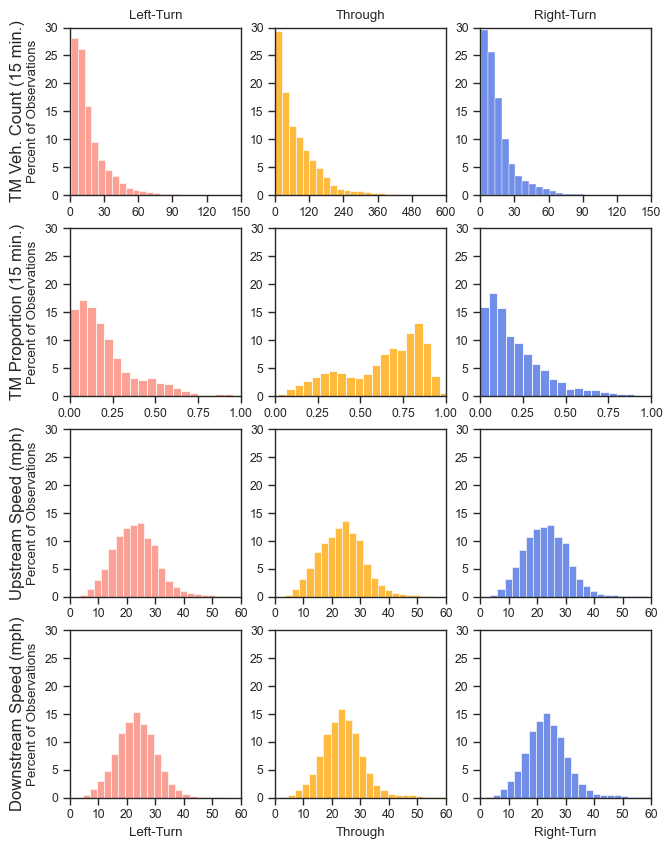

In [9]:
sns.set(rc={"figure.figsize":(7.5, 10)})
sns.set_style("ticks")
sns.set_context("paper")
fig, axes = plt.subplots(4,3)



sns.histplot(x="tmcount", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='LT')&(df['vol_up'].notna())&
                                        (df['vol_dn'].notna())], stat='percent', binwidth=6,ax=axes[0,0],color='salmon')
axes[0,0].set_xlim(0,150)
axes[0,0].set_ylim(0,30)
axes[0,0].set_xticks([i for i in range(0,151,30)])
axes[0,0].set_xlabel(None)
axes[0,0].set_ylabel("Percent of Observations")
axes[0,0].set_title("Left-Turn")
axes[0,0].text(-0.35, 0.5,'TM Veh. Count (15 min.)', fontsize=12,rotation='vertical',verticalalignment ='center',horizontalalignment ='left',transform = axes[0,0].transAxes)


sns.histplot(x="tmcount", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='TH')&(df['vol_up'].notna())&
                                        (df['vol_dn'].notna())], stat='percent',binwidth=24,ax=axes[0,1],color='orange')
axes[0,1].set_xlim(0,600)
axes[0,1].set_ylim(0,30)
axes[0,1].set_xticks([i for i in range(0,601,120)])
axes[0,1].set_xlabel(None)
axes[0,1].set_ylabel(None)
axes[0,1].set_title("Through")

sns.histplot(x="tmcount", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='RT')&(df['vol_up'].notna())&
                                        (df['vol_dn'].notna())], stat='percent',binwidth=6,ax=axes[0,2],color='royalblue')
axes[0,2].set_xlim(0,150)
axes[0,2].set_ylim(0,30)
axes[0,2].set_xticks([i for i in range(0,161,30)])
axes[0,2].set_xlabel(None)
axes[0,2].set_ylabel(None)
axes[0,2].set_title("Right-Turn")

sns.histplot(x="actual_pro", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='LT')&(df['vol_up'].notna())&
                                           (df['vol_dn'].notna())], stat='percent',binwidth=0.05,ax=axes[1,0],color='salmon')
axes[1,0].set_xlim(0,1)
axes[1,0].set_ylim(0,30)
axes[1,0].set_xlabel(None)
axes[1,0].set_ylabel("Percent of Observations")
axes[1,0].text(-0.35, 0.5,'TM Proportion (15 min.)', fontsize=12,rotation='vertical',verticalalignment ='center',horizontalalignment ='left',transform = axes[1,0].transAxes)

sns.histplot(x="actual_pro", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='TH')&(df['vol_up'].notna())&
                                           (df['vol_dn'].notna())], stat='percent',binwidth=0.05,ax=axes[1,1],color='orange')
axes[1,1].set_xlim(0,1)
axes[1,1].set_ylim(0,30)
axes[1,1].set_xlabel(None)
axes[1,1].set_ylabel(None)

sns.histplot(x="actual_pro", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='RT')&(df['vol_up'].notna())&
                                           (df['vol_dn'].notna())], stat='percent',binwidth=0.05,ax=axes[1,2],color='royalblue')
axes[1,2].set_xlim(0,1)
axes[1,2].set_ylim(0,30)
axes[1,2].set_xlabel(None)
axes[1,2].set_ylabel(None)


sns.histplot(x="speed_up", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='LT')&(df['vol_up'].notna())&
                                         (df['vol_dn'].notna())], stat='percent', binwidth=2.5,ax=axes[2,0],color='salmon')
axes[2,0].set_xlim(0,60)
axes[2,0].set_ylim(0,30)
axes[2,0].set_xticks([i for i in range(0,61,10)])
axes[2,0].set_xlabel(None)
axes[2,0].set_ylabel("Percent of Observations")
axes[2,0].text(-0.35, 0.5,'Upstream Speed (mph)', fontsize=12,rotation='vertical',verticalalignment ='center',horizontalalignment ='left',transform = axes[2,0].transAxes)

sns.histplot(x="speed_up", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='TH')&(df['vol_up'].notna())&
                                         (df['vol_dn'].notna())], stat='percent',binwidth=2.5,ax=axes[2,1],color='orange')
axes[2,1].set_xlim(0,60)
axes[2,1].set_ylim(0,30)
axes[2,1].set_xticks([i for i in range(0,61,10)])
axes[2,1].set_xlabel(None)
axes[2,1].set_ylabel(None)

sns.histplot(x="speed_up", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='RT')&(df['vol_up'].notna())&
                                         (df['vol_dn'].notna())], stat='percent',binwidth=2.5,ax=axes[2,2],color='royalblue')
axes[2,2].set_xlim(0,60)
axes[2,2].set_ylim(0,30)
axes[2,2].set_xticks([i for i in range(0,61,10)])
axes[2,2].set_xlabel(None)
axes[2,2].set_ylabel(None)


sns.histplot(x="speed_dn", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='LT')&(df['vol_up'].notna())&
                                         (df['vol_dn'].notna())],stat='percent',binwidth=2.5,ax=axes[3,0],color='salmon')
axes[3,0].set_xlim(0,60)
axes[3,0].set_ylim(0,30)
axes[3,0].set_xticks([i for i in range(0,61,10)])
axes[3,0].set_xlabel('Left-Turn')
axes[3,0].set_ylabel("Percent of Observations")
axes[3,0].text(-0.35, 0.5,'Downstream Speed (mph)', fontsize=12,rotation='vertical',verticalalignment ='center',horizontalalignment ='left',transform = axes[3,0].transAxes)

sns.histplot(x="speed_dn", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='TH')&(df['vol_up'].notna())&
                                         (df['vol_dn'].notna())],stat='percent',binwidth=2.5,ax=axes[3,1],color='orange')
axes[3,1].set_xlim(0,60)
axes[3,1].set_ylim(0,30)
axes[3,1].set_xticks([i for i in range(0,61,10)])
axes[3,1].set_xlabel('Through')
axes[3,1].set_ylabel(None)

sns.histplot(x="speed_dn", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='RT')&(df['vol_up'].notna())&
                                         (df['vol_dn'].notna())],stat='percent',binwidth=2.5,ax=axes[3,2],color='royalblue')
axes[3,2].set_xlim(0,60)
axes[3,2].set_ylim(0,30)
axes[3,2].set_xticks([i for i in range(0,61,10)])
axes[3,2].set_xlabel('Right-Turn')
axes[3,2].set_ylabel(None)

plt.show()

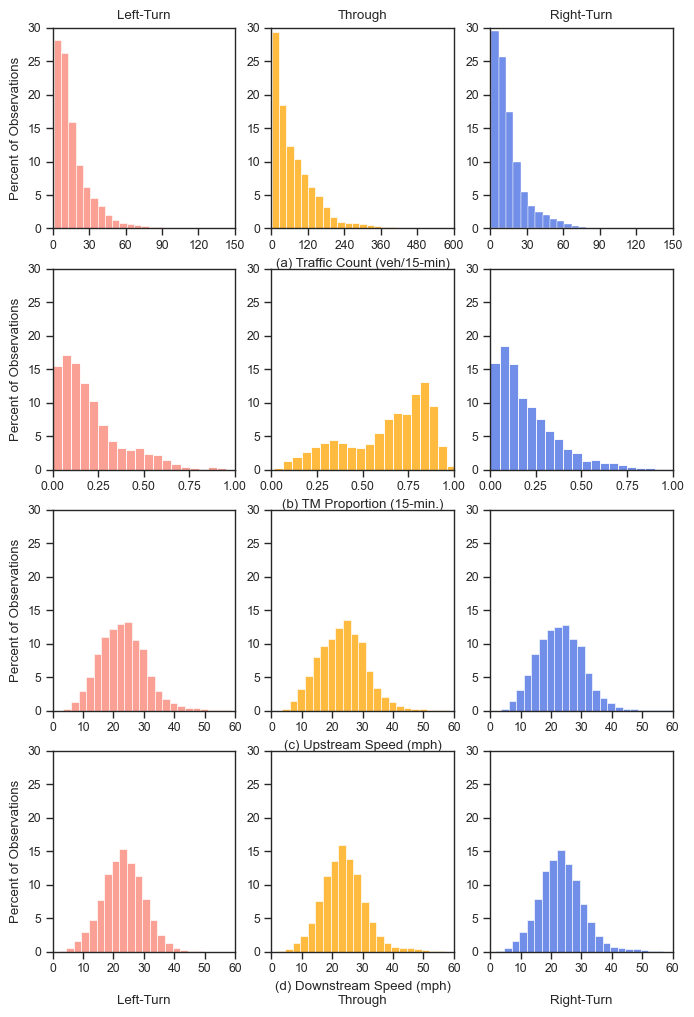

In [13]:
sns.set(rc={"figure.figsize":(8, 12)})
sns.set_style("ticks")
sns.set_context("paper")
fig, axes = plt.subplots(4,3)



sns.histplot(x="tmcount", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='LT')&(df['vol_up'].notna())&
                                        (df['vol_dn'].notna())], stat='percent', binwidth=6,ax=axes[0,0],color='salmon')
axes[0,0].set_xlim(0,150)
axes[0,0].set_ylim(0,30)
axes[0,0].set_xticks([i for i in range(0,151,30)])
axes[0,0].set_xlabel(None)
axes[0,0].set_ylabel("Percent of Observations")
axes[0,0].set_title("Left-Turn")
#axes[0,0].text(-0.35, 0.5,'TM Veh. Count (15 min.)', fontsize=12,rotation='vertical',verticalalignment ='center',horizontalalignment ='left',transform = axes[0,0].transAxes)


sns.histplot(x="tmcount", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='TH')&(df['vol_up'].notna())&
                                        (df['vol_dn'].notna())], stat='percent',binwidth=24,ax=axes[0,1],color='orange')
axes[0,1].set_xlim(0,600)
axes[0,1].set_ylim(0,30)
axes[0,1].set_xticks([i for i in range(0,601,120)])
axes[0,1].set_xlabel('(a) Traffic Count (veh/15-min)')
axes[0,1].set_ylabel(None)
axes[0,1].set_title("Through")

sns.histplot(x="tmcount", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='RT')&(df['vol_up'].notna())&
                                        (df['vol_dn'].notna())], stat='percent',binwidth=6,ax=axes[0,2],color='royalblue')
axes[0,2].set_xlim(0,150)
axes[0,2].set_ylim(0,30)
axes[0,2].set_xticks([i for i in range(0,161,30)])
axes[0,2].set_xlabel(None)
axes[0,2].set_ylabel(None)
axes[0,2].set_title("Right-Turn")

sns.histplot(x="actual_pro", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='LT')&(df['vol_up'].notna())&
                                           (df['vol_dn'].notna())], stat='percent',binwidth=0.05,ax=axes[1,0],color='salmon')
axes[1,0].set_xlim(0,1)
axes[1,0].set_ylim(0,30)
axes[1,0].set_xlabel(None)
axes[1,0].set_ylabel("Percent of Observations")
#axes[1,0].text(-0.35, 0.5,'TM Proportion (15 min.)', fontsize=12,rotation='vertical',verticalalignment ='center',horizontalalignment ='left',transform = axes[1,0].transAxes)

sns.histplot(x="actual_pro", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='TH')&(df['vol_up'].notna())&
                                           (df['vol_dn'].notna())], stat='percent',binwidth=0.05,ax=axes[1,1],color='orange')
axes[1,1].set_xlim(0,1)
axes[1,1].set_ylim(0,30)
axes[1,1].set_xlabel('(b) TM Proportion (15-min.)')
axes[1,1].set_ylabel(None)

sns.histplot(x="actual_pro", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='RT')&(df['vol_up'].notna())&
                                           (df['vol_dn'].notna())], stat='percent',binwidth=0.05,ax=axes[1,2],color='royalblue')
axes[1,2].set_xlim(0,1)
axes[1,2].set_ylim(0,30)
axes[1,2].set_xlabel(None)
axes[1,2].set_ylabel(None)


sns.histplot(x="speed_up", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='LT')&(df['vol_up'].notna())&
                                         (df['vol_dn'].notna())], stat='percent', binwidth=2.5,ax=axes[2,0],color='salmon')
axes[2,0].set_xlim(0,60)
axes[2,0].set_ylim(0,30)
axes[2,0].set_xticks([i for i in range(0,61,10)])
axes[2,0].set_xlabel(None)
axes[2,0].set_ylabel("Percent of Observations")
#axes[2,0].text(-0.35, 0.5,'Upstream Speed (mph)', fontsize=12,rotation='vertical',verticalalignment ='center',horizontalalignment ='left',transform = axes[2,0].transAxes)

sns.histplot(x="speed_up", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='TH')&(df['vol_up'].notna())&
                                         (df['vol_dn'].notna())], stat='percent',binwidth=2.5,ax=axes[2,1],color='orange')
axes[2,1].set_xlim(0,60)
axes[2,1].set_ylim(0,30)
axes[2,1].set_xticks([i for i in range(0,61,10)])
axes[2,1].set_xlabel('(c) Upstream Speed (mph)')
axes[2,1].set_ylabel(None)

sns.histplot(x="speed_up", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='RT')&(df['vol_up'].notna())&
                                         (df['vol_dn'].notna())], stat='percent',binwidth=2.5,ax=axes[2,2],color='royalblue')
axes[2,2].set_xlim(0,60)
axes[2,2].set_ylim(0,30)
axes[2,2].set_xticks([i for i in range(0,61,10)])
axes[2,2].set_xlabel(None)
axes[2,2].set_ylabel(None)


sns.histplot(x="speed_dn", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='LT')&(df['vol_up'].notna())&
                                         (df['vol_dn'].notna())],stat='percent',binwidth=2.5,ax=axes[3,0],color='salmon')
axes[3,0].set_xlim(0,60)
axes[3,0].set_ylim(0,30)
axes[3,0].set_xticks([i for i in range(0,61,10)])
axes[3,0].set_xlabel('\nLeft-Turn')
axes[3,0].set_ylabel("Percent of Observations")
#axes[3,0].text(-0.35, 0.5,'Downstream Speed (mph)', fontsize=12,rotation='vertical',verticalalignment ='center',horizontalalignment ='left',transform = axes[3,0].transAxes)

sns.histplot(x="speed_dn", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='TH')&(df['vol_up'].notna())&
                                         (df['vol_dn'].notna())],stat='percent',binwidth=2.5,ax=axes[3,1],color='orange')
axes[3,1].set_xlim(0,60)
axes[3,1].set_ylim(0,30)
axes[3,1].set_xticks([i for i in range(0,61,10)])
axes[3,1].set_xlabel('(d) Downstream Speed (mph)\nThrough')
axes[3,1].set_ylabel(None)

sns.histplot(x="speed_dn", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['move']=='RT')&(df['vol_up'].notna())&
                                         (df['vol_dn'].notna())],stat='percent',binwidth=2.5,ax=axes[3,2],color='royalblue')
axes[3,2].set_xlim(0,60)
axes[3,2].set_ylim(0,30)
axes[3,2].set_xticks([i for i in range(0,61,10)])
axes[3,2].set_xlabel('\nRight-Turn')
axes[3,2].set_ylabel(None)

plt.show()

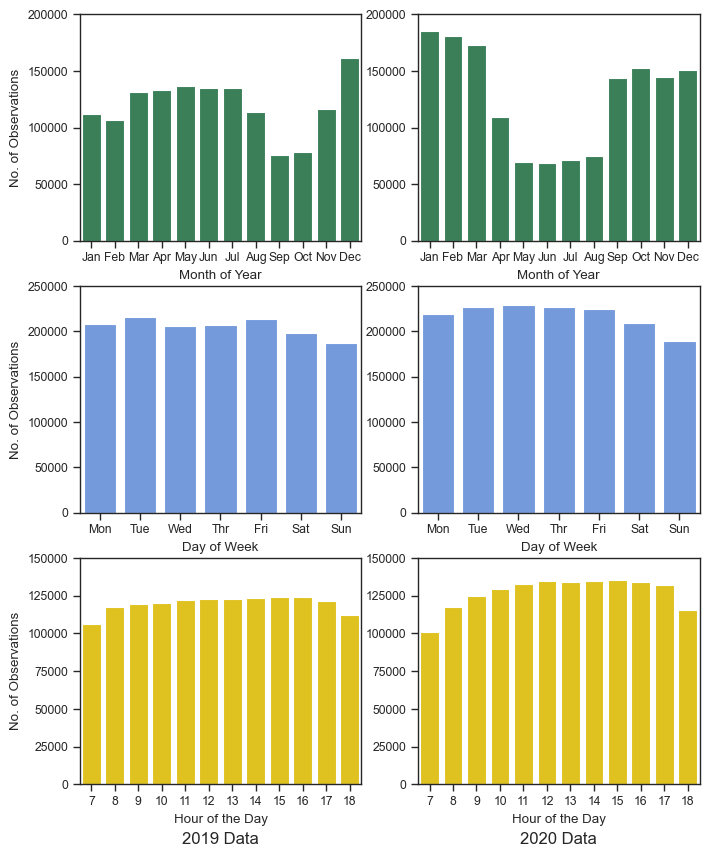

In [14]:
#sns.color_palette("tab10")
#sns.set_color_codes("dark")
sns.set(rc={"figure.figsize":(8, 10)})
sns.set_style("ticks")
sns.set_context("paper")
#sns.set_palette("PuBuGn_d")
fig, axes = plt.subplots(3,2)

axes[0,0] = sns.countplot(x="month", data=dg.loc[(dg['tmcount'].notna())&(dg['vol_up'].notna())&(dg['vol_dn'].notna())],ax=axes[0,0],
                        color='seagreen')
axes[0,0].set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep",'Oct','Nov','Dec'])
axes[0,0].set_xlabel("Month of Year")
axes[0,0].set_ylabel("No. of Observations")
axes[0,0].set_ylim(0,200000)
axes[0,0].set_yticks([i for i in range(0,200001,50000)])

axes[1,0] = sns.countplot(x="weekday", data=dg.loc[(dg['tmcount'].notna())&(dg['vol_up'].notna())&(dg['vol_dn'].notna())],ax=axes[1,0],
                       color='cornflowerblue')
axes[1,0].set_xticklabels(["Mon","Tue","Wed","Thr","Fri","Sat","Sun"])
axes[1,0].set_xlabel("Day of Week")
axes[1,0].set_ylabel("No. of Observations")
axes[1,0].set_ylim(0,250000)

axes[2,0] = sns.countplot(x="hour", data=dg.loc[(dg['tmcount'].notna())&(dg['vol_up'].notna())&(dg['vol_dn'].notna())],ax=axes[2,0],
                       color='Gold')
axes[2,0].set_xlabel("Hour of the Day")
axes[2,0].set_ylabel("No. of Observations")
axes[2,0].set_ylim(0,150000)
axes[2,0].set_yticks([i for i in range(0,150001,25000)])
axes[2,0].set_title("2019 Data",y=-.3,fontsize=12)

axes[0,1] = sns.countplot(x="month", data=df.loc[(df['tmcount'].notna())&(df['vol_up'].notna())&(df['vol_dn'].notna())],ax=axes[0,1],
                        color='seagreen')
axes[0,1].set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep",'Oct','Nov','Dec'])
axes[0,1].set_xlabel("Month of Year")
axes[0,1].set_ylabel("")
axes[0,1].set_ylim(0,200000)
axes[0,1].set_yticks([i for i in range(0,200001,50000)])

axes[1,1] = sns.countplot(x="weekday", data=df.loc[(df['tmcount'].notna())&(df['vol_up'].notna())&(df['vol_dn'].notna())],ax=axes[1,1],
                       color='cornflowerblue')
axes[1,1].set_xticklabels(["Mon","Tue","Wed","Thr","Fri","Sat","Sun"])
axes[1,1].set_xlabel("Day of Week")
axes[1,1].set_ylabel("")
axes[1,1].set_ylim(0,250000)

axes[2,1] = sns.countplot(x="hour", data=df.loc[(df['tmcount'].notna())&(df['vol_up'].notna())&(df['vol_dn'].notna())],ax=axes[2,1],
                       color='Gold')
axes[2,1].set_xlabel("Hour of the Day")
axes[2,1].set_ylabel("")
axes[2,1].set_ylim(0,150000)
axes[2,1].set_yticks([i for i in range(0,150001,25000)])
axes[2,1].set_title("2020 Data",y=-.3,fontsize=12)
plt.show()

In [21]:
df.head()

,pair,measurement_tstamp,hour,quarter,year,month,weekday,day,Up,Dn,Detector_ID,Direction,Exclusive_Lane,roadname_up,xd_up,tmc_up,lanes_up,roadname_dn,xd_dn,tmc_dn,lanes_dn,speed_up,avg_speed_up,ref_speed_up,speed_dn,avg_speed_dn,ref_speed_dn,Intersection Name,l_veh,dir_up,move,h_veh,movements,dir_dn,tmcount,vol_up,vol_dn,time,aadt_up,aadt_dn,p_tmcount,p_vol_up,p_vol_dn,actual_pro,p_pro_up,p_pro_dn
336,"(1595383753,398823258)",2020-01-01 07:00:00,7,1,2020,1,2,1,1595383753,398823258,6171,WB_TH,0,E Riverside Dr,1595383753,112+13118,3,W Riverside Dr,398823258,112+13119,2,28.0,28.0,29.0,14.00,14.0,16.0,CONGRESS AVE / RIVERSIDE DR,33.0,WB,TH,5.0,3,WB,38.0,NaN,NaN,7.25,15836,16989,0.0,0.001,0.001,NaN,0.0,0.0
337,"(1595383753,441645877)",2020-01-01 07:00:00,7,1,2020,1,2,1,1595383753,441645877,6171,WB_RT,0,E Riverside Dr,1595383753,112+13118,3,Congress Ave S,441645877,112+13066,2,28.0,28.0,29.0,21.55,22.0,21.0,NaN,NaN,WB,RT,0.0,3,NB,NaN,NaN,NaN,7.25,15836,8942,0.0,0.001,2.000,NaN,0.0,0.0
338,"(1595383753,449758064)",2020-01-01 07:00:00,7,1,2020,1,2,1,1595383753,449758064,6171,WB_LT,1,E Riverside Dr,1595383753,112+13118,3,Congress Ave S,449758064,112-13064,2,28.0,28.0,29.0,19.00,19.0,22.0,CONGRESS AVE / RIVERSIDE DR,3.0,WB,LT,1.0,3,SB,4.0,NaN,27.0,7.25,15836,14587,0.0,0.001,1.000,NaN,0.0,0.0
339,"(167303451,1595310030)",2020-01-01 07:00:00,7,1,2020,1,2,1,167303451,1595310030,6171,EB_TH,0,W Riverside Dr,167303451,112-13118,4,E Riverside Dr,1595310030,112-13117,2,13.0,13.0,14.0,29.00,29.0,30.0,CONGRESS AVE / RIVERSIDE DR,11.0,EB,TH,3.0,3,EB,14.0,23.0,NaN,7.25,13738,17010,0.0,0.001,0.001,0.608696,0.0,0.0
340,"(167303451,441645877)",2020-01-01 07:00:00,7,1,2020,1,2,1,167303451,441645877,6171,EB_LT,1,W Riverside Dr,167303451,112-13118,4,Congress Ave S,441645877,112+13066,2,13.0,13.0,14.0,21.55,22.0,21.0,CONGRESS AVE / RIVERSIDE DR,1.0,EB,LT,0.0,3,NB,1.0,23.0,NaN,7.25,13738,8942,0.0,0.001,2.000,0.043478,0.0,0.0


In [24]:
df.loc[(df['tmcount'].notna())&(df['vol_up'].notna())&(df['vol_dn'].notna())].groupby(['Detector_ID']).count()

,pair,measurement_tstamp,hour,quarter,year,month,weekday,day,Up,Dn,Direction,Exclusive_Lane,roadname_up,xd_up,tmc_up,lanes_up,roadname_dn,xd_dn,tmc_dn,lanes_dn,speed_up,avg_speed_up,ref_speed_up,speed_dn,avg_speed_dn,ref_speed_dn,Intersection Name,l_veh,dir_up,move,h_veh,movements,dir_dn,tmcount,vol_up,vol_dn,time,aadt_up,aadt_dn,p_tmcount,p_vol_up,p_vol_dn,actual_pro,p_pro_up,p_pro_dn
Detector_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6171,75777,75777,75777,75777,75777,75777,75777,75777,75777,75777,75777,75777,75777,75777,75777,75777,75777,75777,75777,75777,75777,75777,75777,75777,75777,75777,75777,75777,75777,75777,75777,75777,75777,75777,75777,75777,75777,75777,75777,75777,75777,75777,75777,75777,75777
6174,80993,80993,80993,80993,80993,80993,80993,80993,80993,80993,80993,80993,80993,80993,80993,80993,80993,80993,80993,80993,80993,80993,80993,80993,80993,80993,80993,80993,80993,80993,80993,80993,80993,80993,80993,80993,80993,80993,80993,80993,80993,80993,80993,80993,80993
6197,42791,42791,42791,42791,42791,42791,42791,42791,42791,42791,42791,42791,42791,42791,32193,42791,42791,42791,31950,42791,42791,42791,42791,42791,42791,42791,42791,42791,42791,42791,42791,42791,42791,42791,42791,42791,42791,42791,42791,42791,42791,42791,42791,42791,42791
6199,136145,136145,136145,136145,136145,136145,136145,136145,136145,136145,136145,136145,136145,136145,0,136145,136145,136145,0,136145,136145,136145,136145,136145,136145,136145,136145,136145,136145,136145,136145,136145,136145,136145,136145,136145,136145,136145,136145,136145,136145,136145,136145,136145,136145
6212,123099,123099,123099,123099,123099,123099,123099,123099,123099,123099,123099,123099,123099,123099,61139,123099,123099,123099,62140,123099,123099,123099,123099,123099,123099,123099,123099,123099,123099,123099,123099,123099,123099,123099,123099,123099,123099,123099,123099,123099,123099,123099,123099,123099,123099
6351,66782,66782,66782,66782,66782,66782,66782,66782,66782,66782,66782,66782,66782,66782,66782,66782,66782,66782,66782,66782,66782,66782,66782,66782,66782,66782,66782,66782,66782,66782,66782,66782,66782,66782,66782,66782,66782,66782,66782,66782,66782,66782,66782,66782,66782
6353,96154,96154,96154,96154,96154,96154,96154,96154,96154,96154,96154,96154,96154,96154,96154,96154,96154,96154,96154,96154,96154,96154,96154,96154,96154,96154,96154,96154,96154,96154,96154,96154,96154,96154,96154,96154,96154,96154,96154,96154,96154,96154,96154,96154,96154
6354,62638,62638,62638,62638,62638,62638,62638,62638,62638,62638,62638,62638,62638,62638,62638,62638,62638,62638,62638,62638,62638,62638,62638,62638,62638,62638,62638,62638,62638,62638,62638,62638,62638,62638,62638,62638,62638,62638,62638,62638,62638,62638,62638,62638,62638
6549,166140,166140,166140,166140,166140,166140,166140,166140,166140,166140,166140,166140,166140,166140,79961,166140,166140,166140,86098,166140,166140,166140,166140,166140,166140,166140,166140,166140,166140,166140,166140,166140,166140,166140,166140,166140,166140,166140,166140,166140,166140,166140,166140,166140,166140


In [27]:
dg.loc[(dg['tmcount'].notna())&(dg['vol_up'].notna())&(dg['vol_dn'].notna())].groupby(['Detector_ID']).count()

,pair,measurement_tstamp,hour,quarter,year,month,weekday,day,Up,Dn,Direction,Exclusive_Lane,roadname_up,xd_up,tmc_up,lanes_up,roadname_dn,xd_dn,tmc_dn,lanes_dn,speed_up,avg_speed_up,ref_speed_up,speed_dn,avg_speed_dn,ref_speed_dn,Intersection Name,l_veh,dir_up,move,h_veh,movements,dir_dn,tmcount,vol_up,vol_dn,time,aadt_up,aadt_dn,actual_pro
Detector_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6171,109895,109895,109895,109895,109895,109895,109895,109895,109895,109895,109895,109895,109895,109895,109895,109895,109895,109895,109895,109895,109895,109895,109895,109895,109895,109895,109895,109895,109895,109895,109895,109895,109895,109895,109895,109895,109895,109895,109895,109895
6174,139159,139159,139159,139159,139159,139159,139159,139159,139159,139159,139159,139159,139159,139159,139159,139159,139159,139159,139159,139159,139159,139159,139159,139159,139159,139159,139159,139159,139159,139159,139159,139159,139159,139159,139159,139159,139159,139159,139159,139159
6192,47984,47984,47984,47984,47984,47984,47984,47984,47984,47984,47984,47984,47984,47984,43110,47984,47984,47984,22052,47984,47984,47984,47984,47984,47984,47984,47984,47984,47984,47984,47984,47984,47984,47984,47984,47984,47984,47984,47984,47984
6197,180459,180459,180459,180459,180459,180459,180459,180459,180459,180459,180459,180459,180459,180459,136116,180459,180459,180459,133950,180459,180459,180459,180459,180459,180459,180459,180459,180459,180459,180459,180459,180459,180459,180459,180459,180459,180459,180459,180459,180459
6199,163571,163571,163571,163571,163571,163571,163571,163571,163571,163571,163571,163571,163571,163571,0,163571,163571,163571,0,163571,163571,163571,163571,163571,163571,163571,163571,163571,163571,163571,163571,163571,163571,163571,163571,163571,163571,163571,163571,163571
6212,128043,128043,128043,128043,128043,128043,128043,128043,128043,128043,128043,128043,128043,128043,63856,128043,128043,128043,64287,128043,128043,128043,128043,128043,128043,128043,128043,128043,128043,128043,128043,128043,128043,128043,128043,128043,128043,128043,128043,128043
6331,172350,172350,172350,172350,172350,172350,172350,172350,172350,172350,172350,172350,172350,172350,172350,172350,172350,172350,172350,172350,172350,172350,172350,172350,172350,172350,172350,172350,172350,172350,172350,172350,172350,172350,172350,172350,172350,172350,172350,172350
6351,90924,90924,90924,90924,90924,90924,90924,90924,90924,90924,90924,90924,90924,90924,90924,90924,90924,90924,90924,90924,90924,90924,90924,90924,90924,90924,90924,90924,90924,90924,90924,90924,90924,90924,90924,90924,90924,90924,90924,90924
6353,25176,25176,25176,25176,25176,25176,25176,25176,25176,25176,25176,25176,25176,25176,25176,25176,25176,25176,25176,25176,25176,25176,25176,25176,25176,25176,25176,25176,25176,25176,25176,25176,25176,25176,25176,25176,25176,25176,25176,25176


In [63]:
# two hours aggregation
dh = df.loc[df['vol_up'].notna()]
dh.loc[(dh['hour'].mod(2)==1), 'hour']-=1
dh['obcount']=1
dh = dh.groupby(['pair','move','month','day','weekday','hour']).sum().reset_index()
dh = dh.loc[dh['obcount']>6]
dh['p_pro_up'] = dh['p_tmcount']/dh['p_vol_up']
dh['actual_pro'] = dh['tmcount']/dh['vol_up']
dh

C:\Users\szahedi1\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
<ipython-input-63-1abe1474886b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dh['obcount']=1


,pair,move,month,day,weekday,hour,quarter,year,Up,Dn,Detector_ID,Exclusive_Lane,xd_up,lanes_up,xd_dn,lanes_dn,speed_up,avg_speed_up,ref_speed_up,speed_dn,avg_speed_dn,ref_speed_dn,l_veh,h_veh,movements,tmcount,vol_up,vol_dn,time,aadt_up,aadt_dn,p_tmcount,p_vol_up,p_vol_dn,actual_pro,p_pro_up,p_pro_dn,half,obcount
0,"(1595153899,1595237703)",LT,1,1,2,8,19,14140,11166077293,11166663921,46571,7,11166077293,14,11166663921,14,205.568529,83.713926,92.168651,174.66,134.0,147.0,25.0,6.0,21,31.0,96.0,117.0,64.75,14343,64687,0.0,2.005,5.003,0.322917,0.000000,0.000000,11,7
1,"(1595153899,1595237703)",LT,1,1,2,10,18,14140,11166077293,11166663921,46571,7,11166077293,14,11166663921,14,217.249647,87.733566,92.253400,220.04,134.0,147.0,57.0,7.0,21,64.0,145.0,253.0,77.50,14343,64687,4.0,4.005,22.000,0.441379,0.998752,1.100000,11,7
2,"(1595153899,1595237703)",LT,1,1,2,12,20,16160,12761231192,12761901624,53224,8,12761231192,16,12761901624,16,248.779087,106.483573,105.445525,211.30,155.0,168.0,84.0,8.0,24,92.0,214.0,661.0,105.00,16392,73928,2.0,3.005,34.000,0.429907,0.665557,0.833333,12,8
3,"(1595153899,1595237703)",LT,1,1,2,14,17,14140,11166077293,11166663921,46571,7,11166077293,14,11166663921,14,215.287348,84.931531,92.190354,212.96,137.0,147.0,56.0,13.0,21,69.0,168.0,511.0,106.25,14343,64687,1.0,3.004,20.000,0.410714,0.332889,0.250000,10,7
7,"(1595153899,1595237703)",LT,1,2,3,8,20,16160,12761231192,12761901624,53224,8,12761231192,16,12761901624,16,226.752974,91.216449,105.195764,223.46,131.0,168.0,80.0,17.0,24,97.0,300.0,729.0,73.00,16392,73928,2.0,4.005,38.000,0.323333,0.499376,0.285714,12,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270284,"(461676488,449762677)",LT,12,29,1,16,20,16160,3693411904,3598101416,56376,8,3693411904,16,3598101416,8,219.660000,213.000000,232.000000,191.87,232.0,240.0,55.0,1.0,24,56.0,369.0,540.0,137.00,21296,33296,1.0,14.002,22.000,0.151762,0.071418,0.333333,12,8
270288,"(461676488,449762677)",LT,12,30,2,10,20,16160,3693411904,3598101416,56376,8,3693411904,16,3598101416,8,232.700000,218.000000,232.000000,181.40,244.0,240.0,32.0,0.0,24,32.0,238.0,539.0,89.00,21296,33296,2.0,5.004,24.001,0.134454,0.399680,0.625000,12,8
270289,"(461676488,449762677)",LT,12,30,2,12,18,14140,3231735416,3148338739,49329,7,3231735416,14,3148338739,7,184.150000,178.000000,203.000000,173.23,210.0,210.0,35.0,0.0,21,35.0,249.0,507.0,92.50,18634,29134,1.0,7.002,21.000,0.140562,0.142816,0.333333,11,7
270290,"(461676488,449762677)",LT,12,30,2,14,20,16160,3693411904,3598101416,56376,8,3693411904,16,3598101416,8,200.560000,221.000000,232.000000,169.73,224.0,240.0,42.0,0.0,24,42.0,376.0,511.0,121.00,21296,33296,3.0,16.001,16.000,0.111702,0.187488,1.166667,12,8


In [62]:

dh.move.unique()

array(['LT', 'TH', 'RT'], dtype=object)

In [16]:
# One hour aggregation
dh = df.loc[df['vol_up'].notna()]
dh['obcount']=1
dh = dh.groupby(['pair','move','month','day','weekday','hour']).sum().reset_index()
dh = dh.loc[dh['obcount']>3]
dh['p_pro_up'] = dh['p_tmcount']/dh['p_vol_up']
dh['actual_pro'] = dh['tmcount']/dh['vol_up']

<ipython-input-16-b7c0f2ea386f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dh['obcount']=1


<Figure size 800x1000 with 0 Axes>

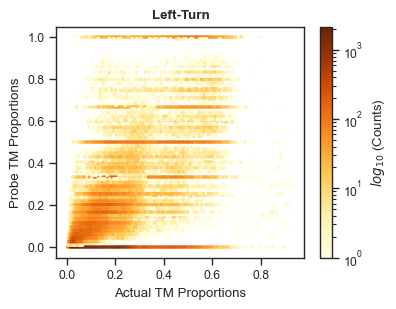

In [17]:
fig=plt.figure()
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 4
fig_size[1] = 3
plt.hexbin(dh[(dh['move']=='LT')&(dh['actual_pro'].notna())]['actual_pro'],dh[(dh['move']=='LT')&(dh['actual_pro'].notna())]['p_pro_up'],bins='log',mincnt=1,cmap='YlOrBr')
plt.xlabel("Actual TM Proportions")
plt.ylabel('Probe TM Proportions')
plt.title('Left-Turn',fontweight='bold')
cb = plt.colorbar()
cb.set_label('$log_{10}$ (Counts)')
plt.show()

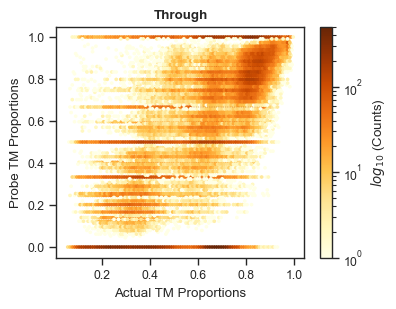

In [18]:

fig=plt.figure()
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 4
fig_size[1] = 3
plt.hexbin(dh[(dh['move']=='TH')&(dh['actual_pro'].notna())]['actual_pro'],dh[(dh['move']=='TH')&(dh['actual_pro'].notna())]['p_pro_up'],bins='log',mincnt=1,cmap='YlOrBr')
plt.xlabel("Actual TM Proportions")
plt.ylabel('Probe TM Proportions')
plt.title('Through',fontweight='bold')
cb = plt.colorbar()
cb.set_label('$log_{10}$ (Counts)')
plt.show()

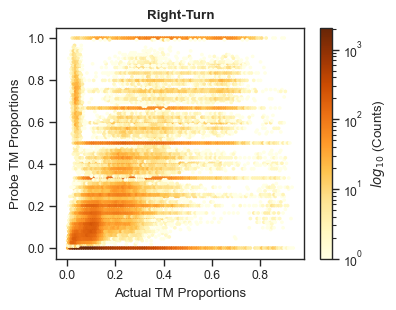

In [19]:

fig=plt.figure()
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 4
fig_size[1] = 3
plt.hexbin(dh[(dh['move']=='RT')&(dh['actual_pro'].notna())]['actual_pro'],dh[(dh['move']=='RT')&(dh['actual_pro'].notna())]['p_pro_up'],bins='log',mincnt=1,cmap='YlOrBr')
plt.xlabel("Actual TM Proportions")
plt.ylabel('Probe TM Proportions')
plt.title('Right-Turn',fontweight='bold')
cb = plt.colorbar()
cb.set_label('$log_{10}$ (Counts)')
plt.show()

In [20]:
# 30 minutes aggregation
df['half']=1
df.loc[df['quarter']>2,'half']=2
dh = df.loc[df['vol_up'].notna()]
dh['obcount']=1
dh = dh.groupby(['pair','move','month','day','weekday','hour','half']).sum().reset_index()
dh = dh.loc[dh['obcount']>1]
dh['p_pro_up'] = dh['p_tmcount']/dh['p_vol_up']
dh['actual_pro'] = dh['tmcount']/dh['vol_up']


<ipython-input-20-caea32fec743>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dh['obcount']=1


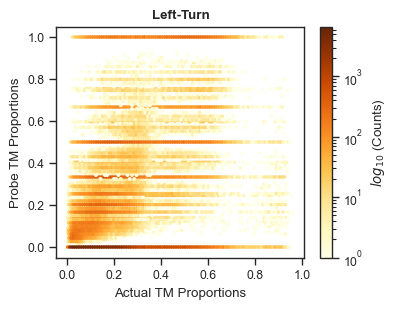

In [21]:

fig=plt.figure()
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 4
fig_size[1] = 3
plt.hexbin(dh[(dh['move']=='LT')&(dh['actual_pro'].notna())]['actual_pro'],dh[(dh['move']=='LT')&(dh['actual_pro'].notna())]['p_pro_up'],bins='log',mincnt=1,cmap='YlOrBr')
plt.xlabel("Actual TM Proportions")
plt.ylabel('Probe TM Proportions')
plt.title('Left-Turn',fontweight='bold')
cb = plt.colorbar()
cb.set_label('$log_{10}$ (Counts)')
plt.show()

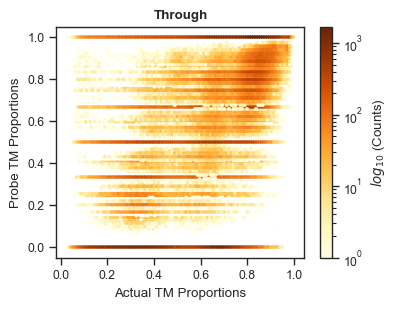

In [22]:

fig=plt.figure()
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 4
fig_size[1] = 3
plt.hexbin(dh[(dh['move']=='TH')&(dh['actual_pro'].notna())]['actual_pro'],dh[(dh['move']=='TH')&(dh['actual_pro'].notna())]['p_pro_up'],bins='log',mincnt=1,cmap='YlOrBr')
plt.xlabel("Actual TM Proportions")
plt.ylabel('Probe TM Proportions')
plt.title('Through',fontweight='bold')
cb = plt.colorbar()
cb.set_label('$log_{10}$ (Counts)')
plt.show()

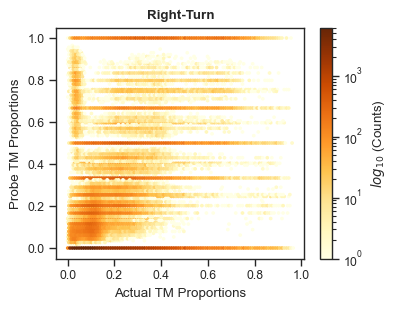

In [23]:

fig=plt.figure()
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 4
fig_size[1] = 3
plt.hexbin(dh[(dh['move']=='RT')&(dh['actual_pro'].notna())]['actual_pro'],dh[(dh['move']=='RT')&(dh['actual_pro'].notna())]['p_pro_up'],bins='log',mincnt=1,cmap='YlOrBr')
plt.xlabel("Actual TM Proportions")
plt.ylabel('Probe TM Proportions')
plt.title('Right-Turn',fontweight='bold')
cb = plt.colorbar()
cb.set_label('$log_{10}$ (Counts)')
plt.show()

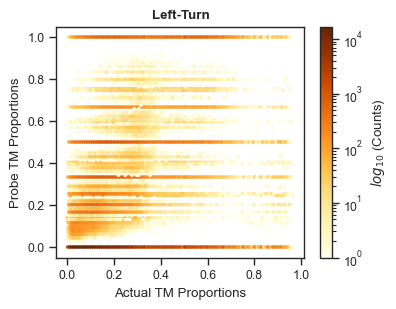

In [24]:
fig=plt.figure()
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 4
fig_size[1] = 3
plt.hexbin(df[(df['move']=='LT')&(df['actual_pro'].notna())]['actual_pro'],df[(df['move']=='LT')&(df['actual_pro'].notna())]['p_pro_up'],bins='log',mincnt=1,cmap='YlOrBr')
plt.xlabel("Actual TM Proportions")
plt.ylabel('Probe TM Proportions')
plt.title('Left-Turn',fontweight='bold')
cb = plt.colorbar()
cb.set_label('$log_{10}$ (Counts)')
plt.show()

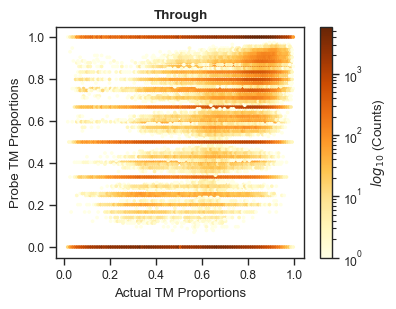

In [25]:
fig=plt.figure()
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 4
fig_size[1] = 3
plt.hexbin(df[(df['move']=='TH')&(df['actual_pro'].notna())]['actual_pro'],df[(df['move']=='TH')&(df['actual_pro'].notna())]['p_pro_up'],bins='log',mincnt=1,cmap='YlOrBr')
plt.xlabel("Actual TM Proportions")
plt.ylabel('Probe TM Proportions')
plt.title('Through',fontweight='bold')
cb = plt.colorbar()
cb.set_label('$log_{10}$ (Counts)')
plt.show()

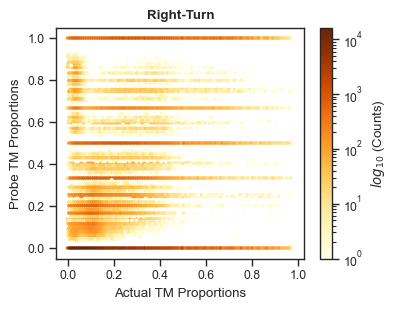

In [26]:
fig=plt.figure()
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 4
fig_size[1] = 3
plt.hexbin(df[(df['move']=='RT')&(df['actual_pro'].notna())]['actual_pro'],df[(df['move']=='RT')&(df['actual_pro'].notna())]['p_pro_up'],bins='log',mincnt=1,cmap='YlOrBr')
plt.xlabel("Actual TM Proportions")
plt.ylabel('Probe TM Proportions')
plt.title('Right-Turn',fontweight='bold')
cb = plt.colorbar()
cb.set_label('$log_{10}$ (Counts)')
plt.show()

In [98]:
df.head()

,pair,measurement_tstamp,hour,quarter,year,month,weekday,day,Up,Dn,Detector_ID,Direction,Exclusive_Lane,roadname_up,xd_up,tmc_up,lanes_up,roadname_dn,xd_dn,tmc_dn,lanes_dn,speed_up,avg_speed_up,ref_speed_up,speed_dn,avg_speed_dn,ref_speed_dn,Intersection Name,l_veh,dir_up,move,h_veh,movements,dir_dn,tmcount,vol_up,vol_dn,time,aadt_up,aadt_dn,p_tmcount,p_vol_up,p_vol_dn,actual_pro,p_pro_up,p_pro_dn,half,binned
336,"(1595383753,398823258)",2020-01-01 07:00:00,7,1,2020,1,2,1,1595383753,398823258,6171,WB_TH,0,E Riverside Dr,1595383753,112+13118,3,W Riverside Dr,398823258,112+13119,2,28.0,28.0,29.0,14.00,14.0,16.0,CONGRESS AVE / RIVERSIDE DR,33.0,WB,TH,5.0,3,WB,38.0,NaN,NaN,7.25,15836,16989,0.0,0.001,0.001,NaN,0.0,0.0,1,"(0, 5]"
337,"(1595383753,441645877)",2020-01-01 07:00:00,7,1,2020,1,2,1,1595383753,441645877,6171,WB_RT,0,E Riverside Dr,1595383753,112+13118,3,Congress Ave S,441645877,112+13066,2,28.0,28.0,29.0,21.55,22.0,21.0,NaN,NaN,WB,RT,0.0,3,NB,NaN,NaN,NaN,7.25,15836,8942,0.0,0.001,2.000,NaN,0.0,0.0,1,"(0, 5]"
338,"(1595383753,449758064)",2020-01-01 07:00:00,7,1,2020,1,2,1,1595383753,449758064,6171,WB_LT,1,E Riverside Dr,1595383753,112+13118,3,Congress Ave S,449758064,112-13064,2,28.0,28.0,29.0,19.00,19.0,22.0,CONGRESS AVE / RIVERSIDE DR,3.0,WB,LT,1.0,3,SB,4.0,NaN,27.0,7.25,15836,14587,0.0,0.001,1.000,NaN,0.0,0.0,1,"(0, 5]"
339,"(167303451,1595310030)",2020-01-01 07:00:00,7,1,2020,1,2,1,167303451,1595310030,6171,EB_TH,0,W Riverside Dr,167303451,112-13118,4,E Riverside Dr,1595310030,112-13117,2,13.0,13.0,14.0,29.00,29.0,30.0,CONGRESS AVE / RIVERSIDE DR,11.0,EB,TH,3.0,3,EB,14.0,23.0,NaN,7.25,13738,17010,0.0,0.001,0.001,0.608696,0.0,0.0,1,"(0, 5]"
340,"(167303451,441645877)",2020-01-01 07:00:00,7,1,2020,1,2,1,167303451,441645877,6171,EB_LT,1,W Riverside Dr,167303451,112-13118,4,Congress Ave S,441645877,112+13066,2,13.0,13.0,14.0,21.55,22.0,21.0,CONGRESS AVE / RIVERSIDE DR,1.0,EB,LT,0.0,3,NB,1.0,23.0,NaN,7.25,13738,8942,0.0,0.001,2.000,0.043478,0.0,0.0,1,"(0, 5]"


In [27]:
df['binned']=pd.cut(x=df['p_vol_up'], bins=[0,5,10,20,50])
df['diff'] = (df['p_pro_up'] - df['actual_pro'])

In [29]:
fig=plt.figure()
fig_size[0] = 3.75
fig_size[1] = 3.75
fig_size = plt.rcParams["figure.figsize"]
flierprops = dict(marker='o', markerfacecolor='b', markersize=1,linestyle='none', markeredgecolor='b')
sns.boxplot(x="binned", y="diff", data=df.loc[(df['move']=='RT')&(df['actual_pro'].notna())],color='royalblue',flierprops=flierprops )

plt.xlabel("Approach Probe Counts")
plt.ylabel('TM Proportions Error')
plt.title('Right-Turn',fontweight='bold')

nobs = ((df.loc[(df['move']=='RT')&(df['actual_pro'].notna())]['binned'].value_counts().values)/df.loc[(df['move']=='RT')&(df['actual_pro'].notna())].shape[0]*100).round(2)
pos = range(len(nobs))
for tick,label in zip(pos,axes.get_xticklabels()):
    axes.text((pos[tick]),-1.5,str(nobs[tick])+'%',horizontalalignment='center',size='small',color='black',weight='semibold')
plt.text(-1.3, -1.5, "share of obs.", horizontalalignment='left', size='small', color='black', weight='semibold')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'get_xticklabels'

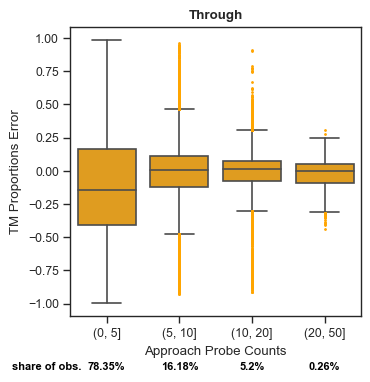

In [176]:
fig=plt.figure()
fig_size[0] = 3.75
fig_size[1] = 3.75
fig_size = plt.rcParams["figure.figsize"]
flierprops = dict(marker='o', markerfacecolor='orange', markersize=1,linestyle='none', markeredgecolor='orange')
axes = sns.boxplot(x="binned", y="diff", data=df.loc[(df['move']=='TH')&(df['actual_pro'].notna())],color='orange',flierprops=flierprops )

plt.xlabel("Approach Probe Counts")
plt.ylabel('TM Proportions Error')
plt.title('Through',fontweight='bold')

nobs = ((df.loc[(df['move']=='TH')&(df['actual_pro'].notna())]['binned'].value_counts().values)/df.loc[(df['move']=='TH')&(df['actual_pro'].notna())].shape[0]*100).round(2)
pos = range(len(nobs))
for tick,label in zip(pos,axes.get_xticklabels()):
    axes.text((pos[tick]),-1.5,str(nobs[tick])+'%',horizontalalignment='center',size='small',color='black',weight='semibold')
plt.text(-1.3, -1.5, "share of obs.", horizontalalignment='left', size='small', color='black', weight='semibold')
plt.show()

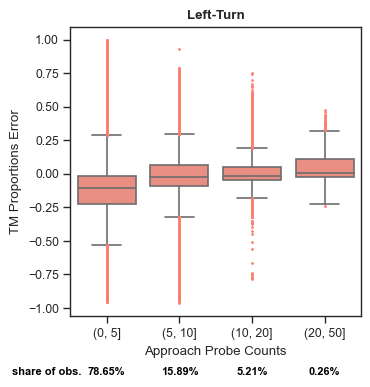

In [177]:
fig=plt.figure()
fig_size[0] = 3.75
fig_size[1] = 3.75
fig_size = plt.rcParams["figure.figsize"]
flierprops = dict(marker='o', markerfacecolor='salmon', markersize=1,linestyle='none', markeredgecolor='salmon')
axes = sns.boxplot(x="binned", y="diff", data=df.loc[(df['move']=='LT')&(df['actual_pro'].notna())],color='salmon',flierprops=flierprops )

plt.xlabel("Approach Probe Counts")
plt.ylabel('TM Proportions Error')
plt.title('Left-Turn',fontweight='bold')

nobs = ((df.loc[(df['move']=='LT')&(df['actual_pro'].notna())]['binned'].value_counts().values)/df.loc[(df['move']=='LT')&(df['actual_pro'].notna())].shape[0]*100).round(2)
pos = range(len(nobs))
for tick,label in zip(pos,axes.get_xticklabels()):
    axes.text((pos[tick]),-1.5,str(nobs[tick])+'%',horizontalalignment='center',size='small',color='black',weight='semibold')
plt.text(-1.3, -1.5, "share of obs.", horizontalalignment='left', size='small', color='black', weight='semibold')
plt.show()

In [ ]:
fig=plt.figure()
fig_size[0] = 3.75
fig_size[1] = 3.75
fig_size = plt.rcParams["figure.figsize"]

axes = sns.boxplot(x="binned", y="diff", data=df.loc[(df['move']=='TH')&(df['actual_pro'].notna())],color='gold')

plt.xlabel("Approach Probe Counts")
plt.ylabel('TM Proportions Error')
plt.title('Through',fontweight='bold')
plt.show()

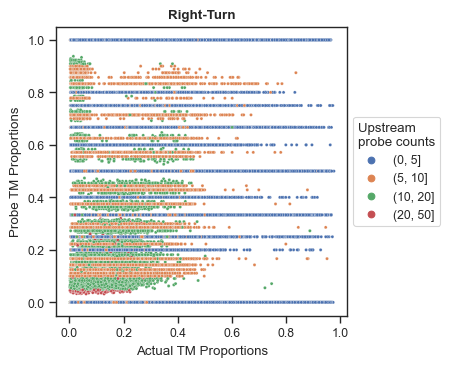

In [92]:


fig=plt.figure()
fig_size[0] = 3.75
fig_size[1] = 3.75
fig_size = plt.rcParams["figure.figsize"]

axes = sns.scatterplot(x="actual_pro", y="p_pro_up", hue="binned", palette="deep",data=df.loc[(df['move']=='RT')&(df['actual_pro'].notna())],s=5)
axes.legend(loc="center left", title="Upstream\nprobe counts", bbox_to_anchor=(1, 0.5))
plt.xlabel("Actual TM Proportions")
plt.ylabel('Probe TM Proportions')
plt.title('Right-Turn',fontweight='bold')
plt.show()

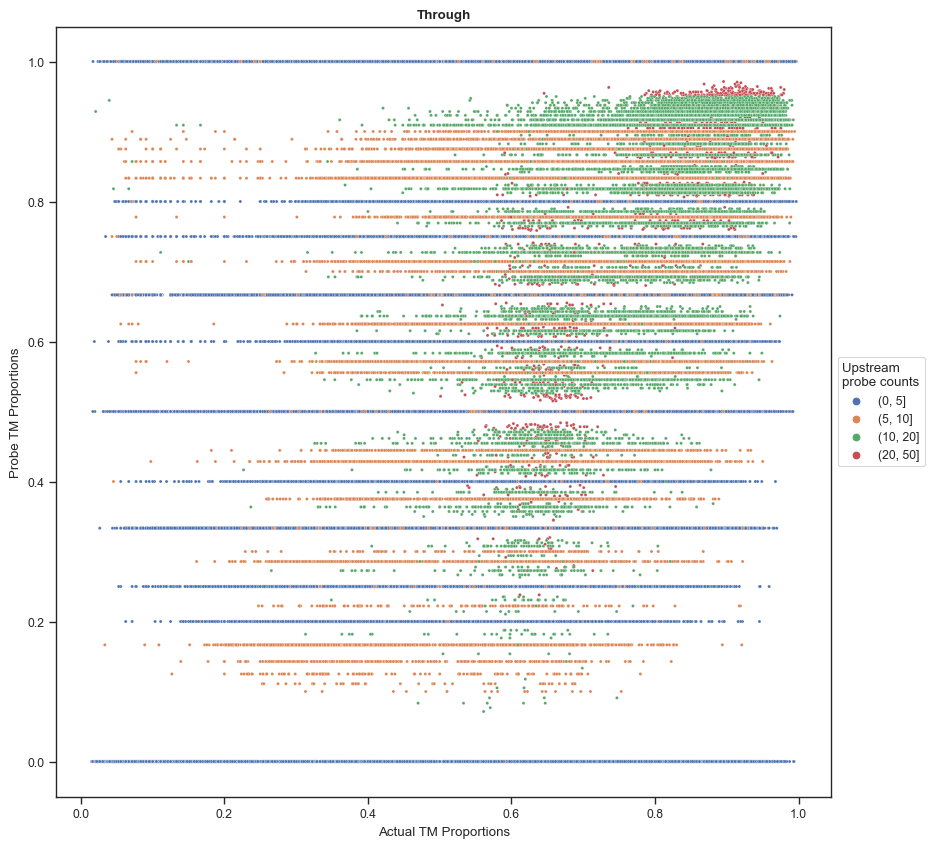

In [96]:


fig=plt.figure()
fig_size[0] = 10
fig_size[1] = 10
fig_size = plt.rcParams["figure.figsize"]

axes = sns.scatterplot(x="actual_pro", y="p_pro_up", hue="binned", palette="deep",data=df.loc[(df['move']=='TH')&(df['actual_pro'].notna())],s=5)
axes.legend(loc="center left", title="Upstream\nprobe counts", bbox_to_anchor=(1, 0.5))
plt.xlabel("Actual TM Proportions")
plt.ylabel('Probe TM Proportions')
plt.title('Through',fontweight='bold')
plt.show()

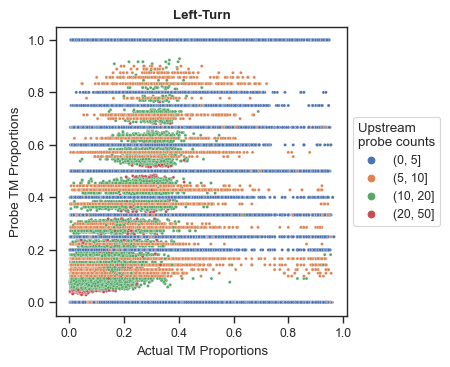

In [94]:


fig=plt.figure()
fig_size[0] = 3.75
fig_size[1] = 3.75
fig_size = plt.rcParams["figure.figsize"]

axes = sns.scatterplot(x="actual_pro", y="p_pro_up", hue="binned", palette="deep",data=df.loc[(df['move']=='LT')&(df['actual_pro'].notna())],s=5)
axes.legend(loc="center left", title="Upstream\nprobe counts", bbox_to_anchor=(1, 0.5))
plt.xlabel("Actual TM Proportions")
plt.ylabel('Probe TM Proportions')
plt.title('Left-Turn',fontweight='bold')
plt.show()

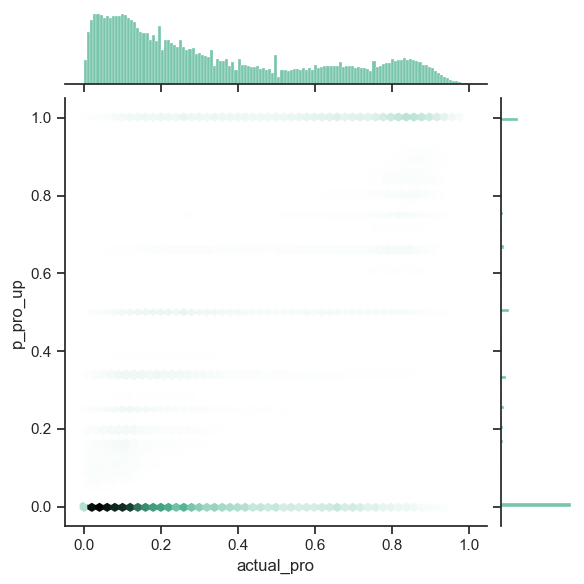

In [13]:
import numpy as np
import seaborn as sns
sns.set_theme(style="ticks")

sns.jointplot(x='actual_pro', y='p_pro_up', data=df.loc[(df['p_vol_up']>0)&(df['tmcount'].notna())&(df['tmcount']<600)&(df['vol_up'].notna())&(df['vol_dn'].notna())],kind="hex", color="#4CB391")
plt.show()

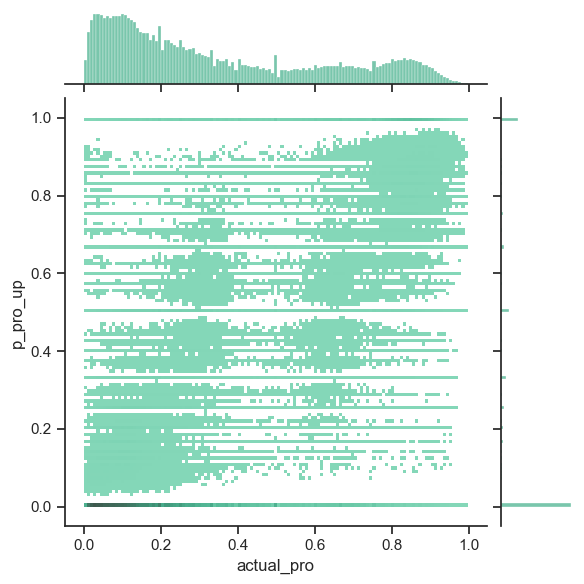

In [33]:
import numpy as np
import seaborn as sns
sns.set_theme(style="ticks")

sns.jointplot(x='actual_pro', y='p_pro_up', data=df.loc[(df['p_vol_up']>0)&(df['tmcount'].notna())&(df['tmcount']<600)&(df['vol_up'].notna())&(df['vol_dn'].notna())],kind="hist", color="#4CB391")
plt.show()

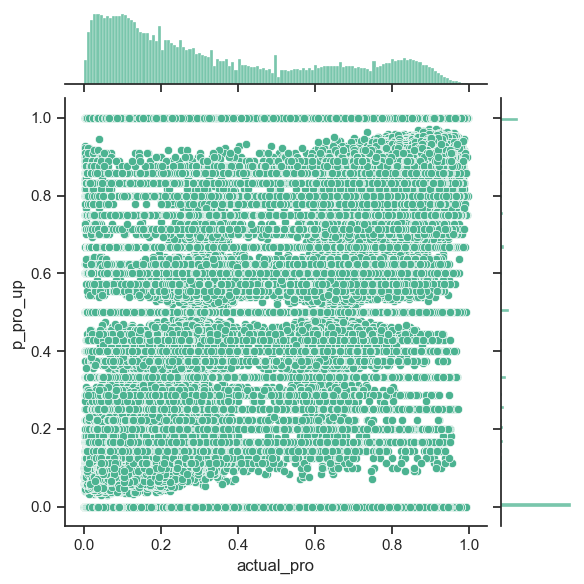

In [34]:
import numpy as np
import seaborn as sns
sns.set_theme(style="ticks")

sns.jointplot(x='actual_pro', y='p_pro_up', data=df.loc[(df['p_vol_up']>0)&(df['tmcount'].notna())&(df['tmcount']<600)&(df['vol_up'].notna())&(df['vol_dn'].notna())], color="#4CB391")
plt.show()

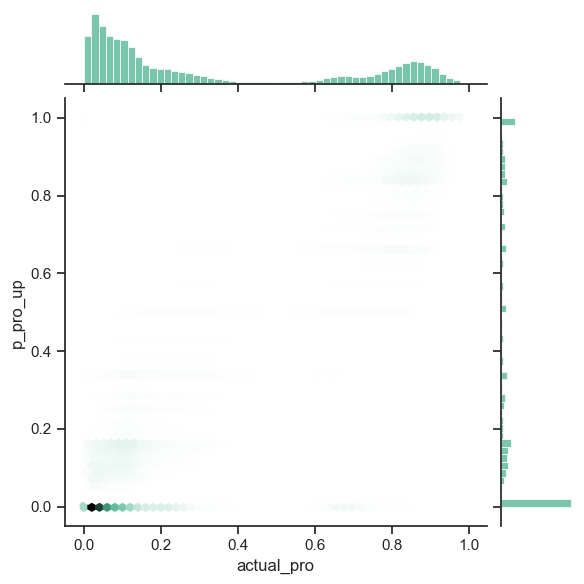

In [14]:
import numpy as np
import seaborn as sns
sns.set_theme(style="ticks")

sns.jointplot(x='actual_pro', y='p_pro_up', data=df.loc[(df['p_vol_up']>5)&(df['tmcount'].notna())&(df['tmcount']<600)&(df['vol_up'].notna())&(df['vol_dn'].notna())],kind="hex", color="#4CB391")
plt.show()

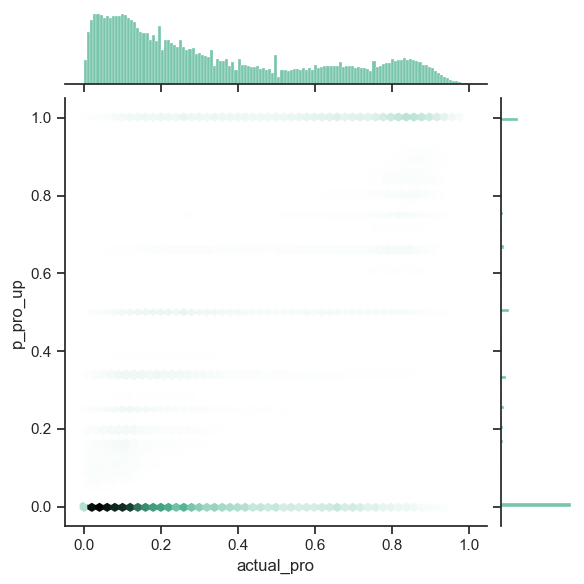

In [15]:
import numpy as np
import seaborn as sns
sns.set_theme(style="ticks")

sns.jointplot(x='actual_pro', y='p_pro_up', data=df.loc[(df['p_vol_up']>-1)&(df['tmcount'].notna())&(df['tmcount']<600)&(df['vol_up'].notna())&(df['vol_dn'].notna())],kind="hex", color="#4CB391")
plt.show()

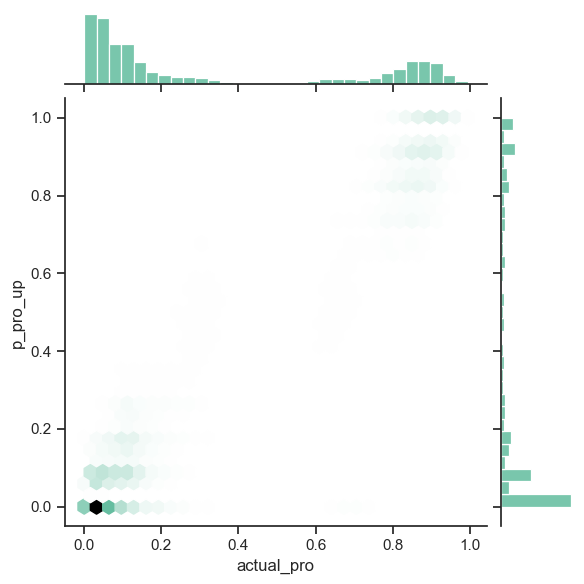

In [16]:
import numpy as np
import seaborn as sns
sns.set_theme(style="ticks")

sns.jointplot(x='actual_pro', y='p_pro_up', data=df.loc[(df['p_vol_up']>10)&(df['tmcount'].notna())&(df['tmcount']<600)&(df['vol_up'].notna())&(df['vol_dn'].notna())],kind="hex", color="#4CB391")
plt.show()

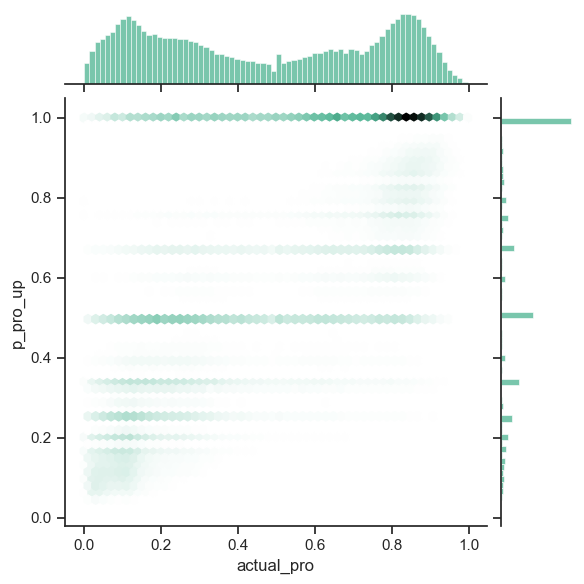

In [17]:
import numpy as np
import seaborn as sns
sns.set_theme(style="ticks")

sns.jointplot(x='actual_pro', y='p_pro_up', data=df.loc[(df['p_tmcount']>0)&(df['tmcount'].notna())&(df['tmcount']<600)&(df['vol_up'].notna())&(df['vol_dn'].notna())],kind="hex", color="#4CB391")
plt.show()

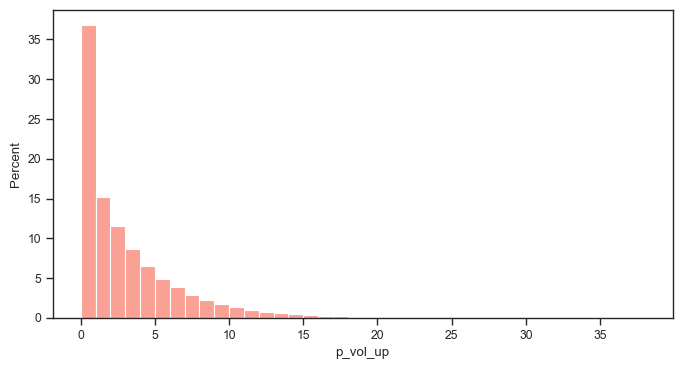

In [18]:
sns.set(rc={"figure.figsize":(8, 4)})
sns.set_style("ticks")
sns.set_context("paper")
fig, axes = plt.subplots(1,1)



sns.histplot(x="p_vol_up", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['vol_up'].notna())&
                                        (df['vol_dn'].notna())], stat='percent', binwidth=1,ax=axes,color='salmon')
#axes[0].set_xlim(0,150)
#axes[0].set_ylim(0,30)
#axes[0].set_xticks([i for i in range(0,151,30)])
#axes[0].set_xlabel(None)
#axes[0].set_ylabel("Percent of Observations")
#axes[0].set_title("Left-Turn")
#axes[0].text(-0.35, 0.5,'TM Veh. Count (15 min.)', fontsize=12,rotation='vertical',verticalalignment ='center',horizontalalignment ='left',transform = axes[0,0].transAxes)
plt.show()

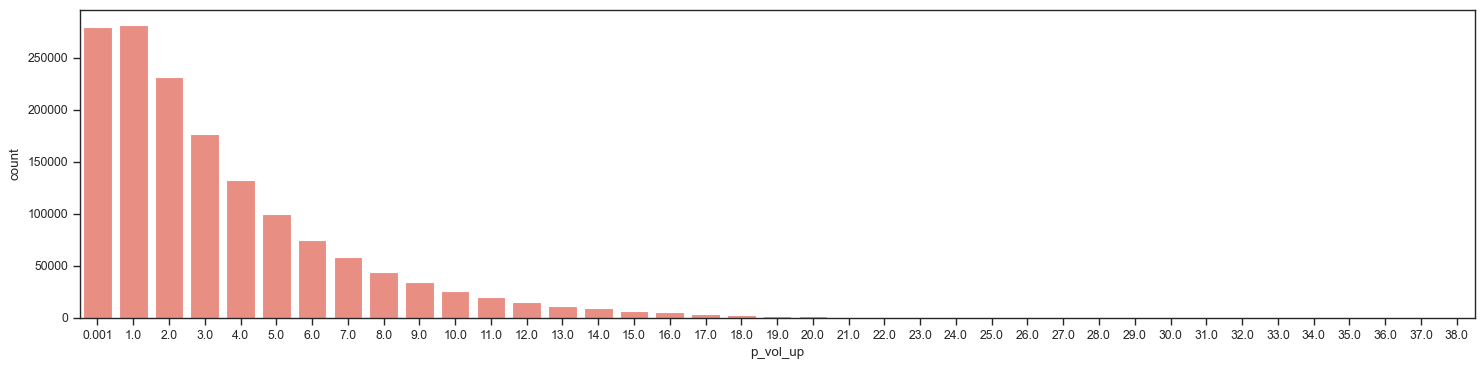

In [19]:
sns.set(rc={"figure.figsize":(18, 4)})
sns.set_style("ticks")
sns.set_context("paper")
fig, axes = plt.subplots(1,1)



sns.countplot(x="p_vol_up", data = df.loc[(df['tmcount'].notna())&(df['tmcount']<600)&(df['vol_up'].notna())&
                                        (df['vol_dn'].notna())], ax=axes,color='salmon')
#axes[0].set_xlim(0,150)
#axes[0].set_ylim(0,30)
#axes[0].set_xticks([i for i in range(0,151,30)])
#axes[0].set_xlabel(None)
#axes[0].set_ylabel("Percent of Observations")
#axes[0].set_title("Left-Turn")
#axes[0].text(-0.35, 0.5,'TM Veh. Count (15 min.)', fontsize=12,rotation='vertical',verticalalignment ='center',horizontalalignment ='left',transform = axes[0,0].transAxes)
plt.show()

In [91]:
import scipy.stats as stats

a, b = 0.76, 0.91
mu, sigma = 0.78, 1
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = pd.DataFrame(dist.rvs(10)).rename(columns={0:"RF"})

a, b = 0.89, 0.98
mu, sigma = 0.90, 1
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = dq.join(pd.DataFrame(dist.rvs(10))).rename(columns={0:"XGBoost"})

a, b = 0.88, 0.97
mu, sigma = 0.98, 1
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = dq.join(pd.DataFrame(dist.rvs(10))).rename(columns={0:"MLP"})

a, b = 0.92, .99
mu, sigma = 0.98, 1
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = dq.join(pd.DataFrame(dist.rvs(10))).rename(columns={0:"MLP-FT"})

df1 = dq.copy()
#df1.to_csv("D:\\Amir_Nohekhan\\Results_Feb\\df1.csv", sep=',')

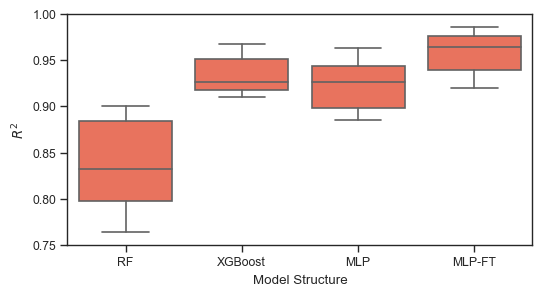

In [92]:
sns.set(rc={"figure.figsize":(6, 3)})
sns.set_style("white")
sns.set_style("ticks")
sns.set_context("paper")

ax=sns.boxplot(x="variable", y="value", data=pd.melt(df1),color='tomato')
ax.set_ylim(0.75,1)
ax.set_xlabel("Model Structure")
ax.set_ylabel('$R^2$')
plt.show()

In [93]:
df1.to_csv("D:\\Amir_Nohekhan\\Results_Feb\\df1.csv", sep=',')

In [46]:
import scipy.stats as stats


a, b = 13, 26
mu, sigma = 13, 10
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = pd.DataFrame(dist.rvs(10)).rename(columns={0:"RF"})

a, b = 7, 22
mu, sigma = 10, 15
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = dq.join(pd.DataFrame(dist.rvs(10))).rename(columns={0:"XGBoost"})

a, b = 6, 24
mu, sigma = 13, 10
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = dq.join(pd.DataFrame(dist.rvs(10))).rename(columns={0:"MLP"})

a, b = 4.1, 9.3
mu, sigma = 5, 6
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = dq.join(pd.DataFrame(dist.rvs(10))).rename(columns={0:"MLP-FT"})

df2 = dq.copy()
#df2.to_csv("D:\\Amir_Nohekhan\\Results_Feb\\df2.csv", sep=',')

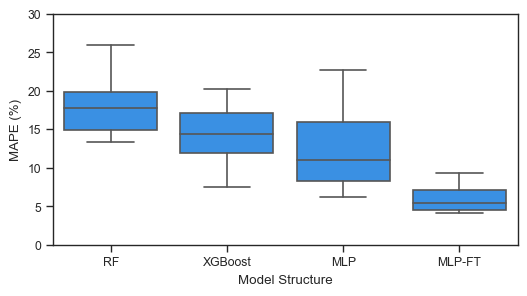

In [47]:
sns.set(rc={"figure.figsize":(6, 3)})
sns.set_style("white")
sns.set_style("ticks")
sns.set_context("paper")
ax=sns.boxplot(x="variable", y="value", data=pd.melt(df2),color='dodgerblue')
ax.set_ylim(0,30)
ax.set_xlabel("Model Structure")
ax.set_ylabel('MAPE (%)')
plt.show()

In [48]:
#df2.to_csv("D:\\Amir_Nohekhan\\Results_Feb\\df2.csv", sep=',')

In [55]:
import scipy.stats as stats

a, b = 4, 13
mu, sigma = 4, 7
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = pd.DataFrame(dist.rvs(10)).rename(columns={0:"RF"})

a, b = 2, 9
mu, sigma = 4, 4
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = dq.join(pd.DataFrame(dist.rvs(5))).rename(columns={0:"XGBoost"})

a, b = 2, 8
mu, sigma = 3, 2.2
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = dq.join(pd.DataFrame(dist.rvs(10))).rename(columns={0:"MLP"})

a, b = 1, 3.5
mu, sigma = 2, 3
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = dq.join(pd.DataFrame(dist.rvs(10))).rename(columns={0:"MLP-FT"})
df3 = dq.copy()
#df3.to_csv("D:\\Amir_Nohekhan\\Results_Feb\\df3.csv", sep=',')

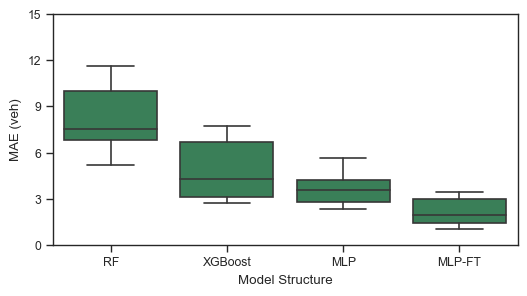

In [56]:
sns.set(rc={"figure.figsize":(6, 3)})
sns.set_style("white")
sns.set_style("ticks")
sns.set_context("paper")

ax=sns.boxplot(x="variable", y="value", data=pd.melt(df3),color='seagreen')
ax.set_ylim(0,15)
ax.set_yticks(np.arange(0, 15.1, step=3))
ax.set_xlabel("Model Structure")
ax.set_ylabel('MAE (veh)')
plt.show()

In [57]:
#df3.to_csv("D:\\Amir_Nohekhan\\Results_Feb\\df3.csv", sep=',')

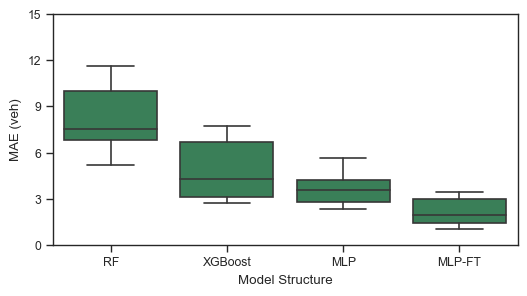

In [220]:
sns.set(rc={"figure.figsize":(6, 3)})
sns.set_style("white")
sns.set_style("ticks")
sns.set_context("paper")

ax=sns.boxplot(x="variable", y="value", data=pd.melt(df3),color='seagreen')
ax.set_ylim(0,15)
ax.set_yticks(np.arange(0, 15.1, step=3))
ax.set_xlabel("Model Structure")
ax.set_ylabel('MAE (veh)')
plt.show()

In [189]:
df3.describe()

,RF,XGBoost,MLP,MLP-FT
count,10.000000,5.000000,10.000000,10.000000
mean,8.163677,4.896056,3.713256,2.182878
std,2.330544,2.196904,1.155783,0.909841
min,5.210917,2.752967,2.318537,1.027710
25%,6.844543,3.090177,2.778039,1.395299
50%,7.553496,4.261132,3.560025,1.959279
75%,10.021925,6.667257,4.184197,3.005037
max,11.594503,7.708748,5.672594,3.421631


In [79]:
import scipy.stats as stats

a, b = 0.55, 0.77
mu, sigma = 0.5, 1
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = pd.DataFrame(dist.rvs(20)).rename(columns={0:"None"})

a, b = 0.69, 0.89
mu, sigma = .75, 0.9
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = dq.join(pd.DataFrame(dist.rvs(20))).rename(columns={0:"%0"})

a, b = 0.75, 0.97
mu, sigma = .7, 0.9
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = dq.join(pd.DataFrame(dist.rvs(20))).rename(columns={0:"%12.5"})

a, b = 0.85, 0.974
mu, sigma = 0.7, 1
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = dq.join(pd.DataFrame(dist.rvs(20))).rename(columns={0:"%25.0"})

a, b = 0.87, 0.975
mu, sigma = 0.73, 1
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = dq.join(pd.DataFrame(dist.rvs(20))).rename(columns={0:"%37.5"})

a, b = 0.88, 0.98
mu, sigma = 0.84, 1
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = dq.join(pd.DataFrame(dist.rvs(20))).rename(columns={0:"%50.0"})

a, b = 0.89, 0.981
mu, sigma = 0.6, 0.5
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = dq.join(pd.DataFrame(dist.rvs(20))).rename(columns={0:"%67.5"})

a, b = 0.9, 0.982
mu, sigma = 0.9, 0.4
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = dq.join(pd.DataFrame(dist.rvs(20))).rename(columns={0:"%75.0"})

a, b = 0.91, 0.99
mu, sigma = 0.6, 0.3
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = dq.join(pd.DataFrame(dist.rvs(20))).rename(columns={0:"%87.5"})

a, b = 0.92, 0.99
mu, sigma = 0.98, 1
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = dq.join(pd.DataFrame(dist.rvs(20))).rename(columns={0:"Full"})

df4 = dq.copy()
#df4.to_csv("D:\\Amir_Nohekhan\\Results_Feb\\df4.csv", sep=',')

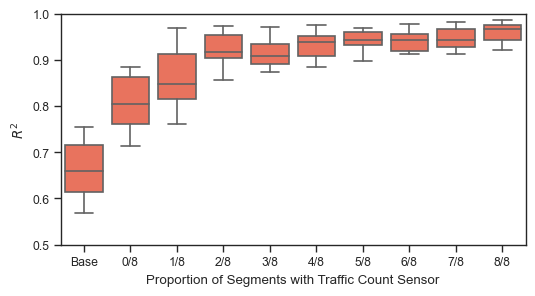

In [95]:
df4['Full'] = df1['MLP-FT']
sns.set(rc={"figure.figsize":(6, 3)})
sns.set_style("white")
sns.set_style("ticks")
sns.set_context("paper")
df4 =df4.rename(columns={'None':'Base','%0':'0/8','%12.5':'1/8','%25.0':'2/8','%37.5':'3/8','%50.0':'4/8','%67.5':'5/8','%75.0':'6/8','%87.5':'7/8','Full':'8/8'})
ax=sns.boxplot(x="variable", y="value", data=pd.melt(df4),color='tomato')


ax.set_ylim(0.5,1)
ax.set_xlabel("Proportion of Segments with Traffic Count Sensor")
ax.set_ylabel('$R^2$')
plt.show()


In [97]:
df4.to_csv("D:\\Amir_Nohekhan\\Results_Feb\\df4.csv", sep=',')

In [110]:
import scipy.stats as stats

a, b = 28, 53
mu, sigma = 55, 25
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = pd.DataFrame(dist.rvs(20)).rename(columns={0:"None"})

a, b = 19, 41
mu, sigma = 34, 20.2
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = dq.join(pd.DataFrame(dist.rvs(20))).rename(columns={0:"%0"})

a, b = 14, 34
mu, sigma = 30, 20.2
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = dq.join(pd.DataFrame(dist.rvs(20))).rename(columns={0:"%12.5"})

a, b = 9.7, 22.3
mu, sigma = 15, 15.1
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = dq.join(pd.DataFrame(dist.rvs(20))).rename(columns={0:"%25.0"})

a, b = 8.5, 19
mu, sigma = 16.1, 10.4
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = dq.join(pd.DataFrame(dist.rvs(20))).rename(columns={0:"%37.5"})

a, b = 6.3, 18.05
mu, sigma = 15.2, 8.3
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = dq.join(pd.DataFrame(dist.rvs(20))).rename(columns={0:"%50.0"})

a, b = 5.6, 15.1
mu, sigma = 11.3, 7.3
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = dq.join(pd.DataFrame(dist.rvs(20))).rename(columns={0:"%67.5"})

a, b = 4.7, 13.3
mu, sigma = 14.2, 5.2
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = dq.join(pd.DataFrame(dist.rvs(20))).rename(columns={0:"%75.0"})

a, b = 4.2, 10.7
mu, sigma = 8.1, 4.1
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = dq.join(pd.DataFrame(dist.rvs(20))).rename(columns={0:"%87.5"})

a, b = 4.1, 9.3
mu, sigma = 4.2, 6
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = dq.join(pd.DataFrame(dist.rvs(20))).rename(columns={0:"Full"})
df5 = dq.copy()


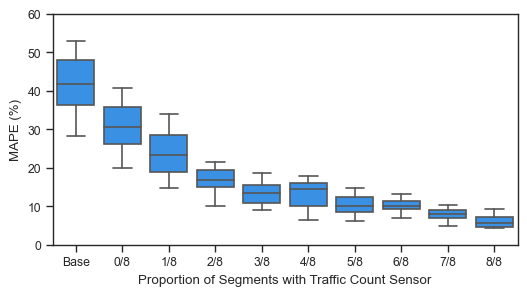

In [111]:
df5['Full'] = df2['MLP-FT']
df5 =df5.rename(columns={'None':'Base','%0':'0/8','%12.5':'1/8','%25.0':'2/8','%37.5':'3/8','%50.0':'4/8','%67.5':'5/8','%75.0':'6/8','%87.5':'7/8','Full':'8/8'})

sns.set(rc={"figure.figsize":(6, 3)})
sns.set_style("white")
sns.set_style("ticks")
sns.set_context("paper")
ax=sns.boxplot(x="variable", y="value", data=pd.melt(df5),color='dodgerblue')
ax.set_ylim(0,60)
ax.set_xlabel("Proportion of Segments with Traffic Count Sensor")
ax.set_ylabel('MAPE (%)')
plt.show()

In [112]:
df5.to_csv("D:\\Amir_Nohekhan\\Results_Feb\\df5.csv", sep=',')

In [117]:
import scipy.stats as stats

a, b = 7.3, 14.4
mu, sigma = 12, 25
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = pd.DataFrame(dist.rvs(20)).rename(columns={0:"None"})

a, b = 6.3, 11.7
mu, sigma = 9, 20
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = dq.join(pd.DataFrame(dist.rvs(20))).rename(columns={0:"%0"})

a, b = 4.7, 9.1
mu, sigma = 7, 15
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = dq.join(pd.DataFrame(dist.rvs(20))).rename(columns={0:"%12.5"})

a, b = 3.9, 8.3
mu, sigma = 6, 10
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = dq.join(pd.DataFrame(dist.rvs(20))).rename(columns={0:"%25.0"})

a, b = 3.16, 7.8
mu, sigma = 5, 8
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = dq.join(pd.DataFrame(dist.rvs(20))).rename(columns={0:"%37.5"})

a, b = 2.55, 6.5
mu, sigma = 4, 7
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = dq.join(pd.DataFrame(dist.rvs(20))).rename(columns={0:"%50.0"})

a, b = 2.11, 5.05
mu, sigma = 4, 6
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = dq.join(pd.DataFrame(dist.rvs(20))).rename(columns={0:"%67.5"})

a, b = 1.7, 4.75
mu, sigma = 3, 5
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = dq.join(pd.DataFrame(dist.rvs(20))).rename(columns={0:"%75.0"})

a, b = 1.37, 3.95
mu, sigma = 2, 4
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = dq.join(pd.DataFrame(dist.rvs(20))).rename(columns={0:"%87.5"})

a, b = 1, 3.5
mu, sigma = 2, 3
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
dq = dq.join(pd.DataFrame(dist.rvs(20))).rename(columns={0:"Full"})
df6 = dq.copy()


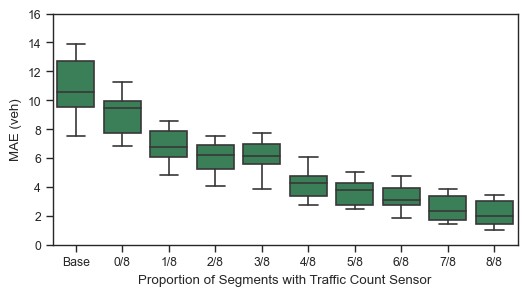

In [118]:
df6['Full'] = df3['MLP-FT']
df6 =df6.rename(columns={'None':'Base','%0':'0/8','%12.5':'1/8','%25.0':'2/8','%37.5':'3/8','%50.0':'4/8','%67.5':'5/8','%75.0':'6/8','%87.5':'7/8','Full':'8/8'})
sns.set(rc={"figure.figsize":(6, 3)})
sns.set_style("white")
sns.set_style("ticks")
sns.set_context("paper")
ax=sns.boxplot(x="variable", y="value", data=pd.melt(df6),color='seagreen')
ax.set_xlabel("Proportion of Segments with Traffic Count Sensor")
ax.set_ylabel('MAE (veh)')
ax.set_ylim(0,16)
plt.show()

In [119]:
df6.to_csv("D:\\Amir_Nohekhan\\Results_Feb\\df6.csv", sep=',')

In [194]:
df6.describe()

,Base,0/8,1/8,2/8,3/8,4/8,5/8,6/8,7/8,8/8
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,10.000000
mean,10.737532,9.093802,6.790969,6.023173,6.098267,4.218847,3.669210,3.278957,2.491261,2.182878
std,2.023634,1.513373,1.209332,1.054207,1.011105,0.929847,0.890501,0.774806,0.876989,0.909841
min,7.496621,6.819387,4.836868,4.018078,3.829444,2.703399,2.458650,1.848429,1.394913,1.027710
25%,9.549088,7.750077,6.034638,5.227002,5.551362,3.368706,2.710110,2.754047,1.685200,1.395299
50%,10.581725,9.428708,6.730655,6.174977,6.106136,4.276566,3.763521,3.113898,2.346907,1.959279
75%,12.681720,9.947571,7.861085,6.901555,6.931484,4.755011,4.281210,3.913946,3.344928,3.005037
max,13.865625,11.280847,8.582034,7.486981,7.729795,6.040192,5.040819,4.731649,3.835820,3.421631


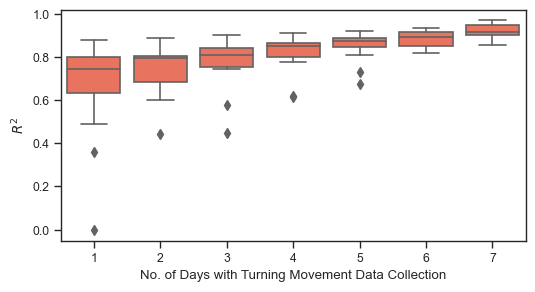

In [222]:
dj = pd.read_csv("D:\\Amir_Nohekhan\\Results_Feb\\groundtruth4.csv")
df7 = dj[['w','R2']]

sns.set(rc={"figure.figsize":(6, 3)})
sns.set_style("white")
sns.set_style("ticks")
sns.set_context("paper")




ax=sns.boxplot(x="w", y="R2", data=df7,color='tomato',showfliers=True)
ax.set_xlabel("No. of Days with Turning Movement Data Collection")
ax.set_ylabel('$R^2$')
#ax.set_ylim(0,1)

plt.show()

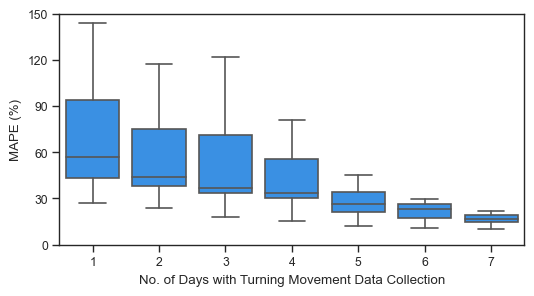

In [214]:
dj = pd.read_csv("D:\\Amir_Nohekhan\\Results_Feb\\groundtruth4.csv")
df7 = dj[['w','MAPE']]

sns.set(rc={"figure.figsize":(6, 3)})
sns.set_style("white")
sns.set_style("ticks")
sns.set_context("paper")




ax=sns.boxplot(x="w", y="MAPE", data=df7,color='dodgerblue',showfliers=False)
ax.set_xlabel("No. of Days with Turning Movement Data Collection")
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0,150)
ax.set_yticks(np.arange(0, 150.1, step=30))
plt.show()

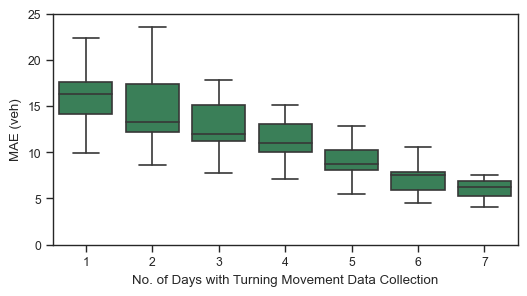

In [207]:
dj = pd.read_csv("D:\\Amir_Nohekhan\\Results_Feb\\groundtruth4.csv")
df7 = dj[['w','MAE']]

sns.set(rc={"figure.figsize":(6, 3)})
sns.set_style("white")
sns.set_style("ticks")
sns.set_context("paper")




ax=sns.boxplot(x="w", y="MAE", data=df7,color='seagreen',showfliers=False)
ax.set_xlabel("No. of Days with Turning Movement Data Collection")
ax.set_ylabel('MAE (veh)')
ax.set_ylim(0,25)
ax.set_yticks(np.arange(0, 25.1, step=5))
plt.show()

In [224]:
df12 = pd.read_csv("D:\\Amir_Nohekhan\\Results_Feb\\df12.csv")
df12.describe()

,1,2,3,4,5,6,7
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,20.000000
mean,17.210321,15.794552,13.556650,11.843007,9.392690,7.223762,6.023173
std,6.154100,6.411526,4.166372,3.100145,2.311261,1.580589,1.054207
min,9.935441,8.562336,7.771902,7.047675,5.446118,4.469913,4.018078
25%,14.071432,12.148055,11.215009,10.060352,8.043018,5.850155,5.227002
50%,16.305759,13.303388,11.923806,11.027492,8.664618,7.488191,6.174977
75%,17.593355,17.386091,15.142385,13.014505,10.230847,7.896964,6.901555
max,36.545856,35.478876,25.358181,20.009054,14.504720,10.558434,7.486981


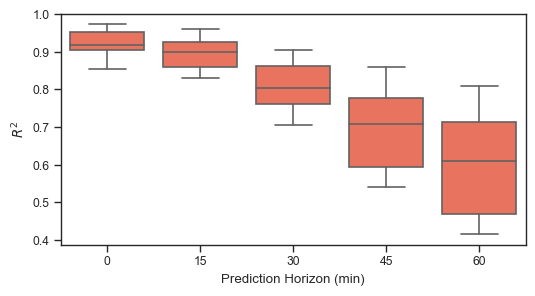

In [286]:
df13 = pd.read_csv("D:\\Amir_Nohekhan\\Results_Feb\\df7.csv")
df13 = df13.drop(['Column1'],axis=1)
df13['0'] = df4['2/8']
#df13 =df6.rename(columns={'None':'Base','%0':'0/8','%12.5':'1/8','%25.0':'2/8','%37.5':'3/8','%50.0':'4/8','%67.5':'5/8','%75.0':'6/8','%87.5':'7/8','Full':'8/8'})
sns.set(rc={"figure.figsize":(6, 3)})
sns.set_style("white")
sns.set_style("ticks")
sns.set_context("paper")
ax=sns.boxplot(x="variable", y="value", data=pd.melt(df13),color='tomato')
ax.set_xlabel("Prediction Horizon (min)")
ax.set_ylabel('$R^2$')
#ax.set_ylim(0,16)
plt.show()

In [289]:
df13.describe()

,0,15,30,45,60
count,20.000000,25.000000,25.000000,25.000000,25.000000
mean,16.527179,20.480267,25.761716,37.311363,56.696617
std,3.111919,3.489984,4.977811,6.847993,15.478116
min,10.023498,14.541000,20.128231,25.646400,37.328492
25%,14.929038,16.000000,21.410933,31.828259,43.452994
50%,16.683155,21.000000,24.000000,36.593844,55.000000
75%,19.315469,23.000000,29.971746,45.000000,74.000000
max,21.486045,26.000000,34.362060,49.249945,81.000000


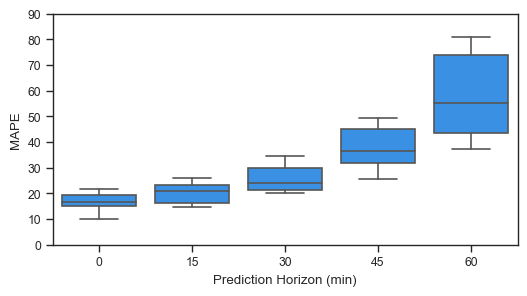

In [288]:
df13 = pd.read_csv("D:\\Amir_Nohekhan\\Results_Feb\\df8.csv")
df13 = df13.drop(['Column1'],axis=1)
df13['0'] = df5['2/8']
#df13 =df6.rename(columns={'None':'Base','%0':'0/8','%12.5':'1/8','%25.0':'2/8','%37.5':'3/8','%50.0':'4/8','%67.5':'5/8','%75.0':'6/8','%87.5':'7/8','Full':'8/8'})
sns.set(rc={"figure.figsize":(6, 3)})
sns.set_style("white")
sns.set_style("ticks")
sns.set_context("paper")
ax=sns.boxplot(x="variable", y="value", data=pd.melt(df13),color='dodgerblue')
ax.set_xlabel("Prediction Horizon (min)")
ax.set_ylabel('MAPE')
ax.set_ylim(0,90)
plt.show()

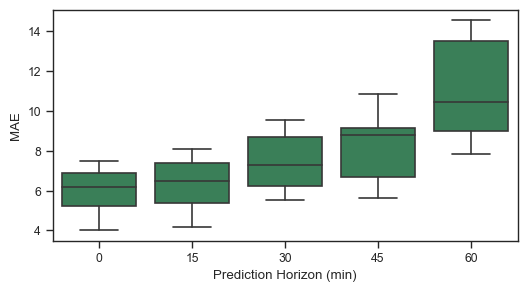

In [290]:
df13 = pd.read_csv("D:\\Amir_Nohekhan\\Results_Feb\\df9.csv")
df13 = df13.drop(['Column1'],axis=1)
df13['0'] = df6['2/8']
#df13 =df6.rename(columns={'None':'Base','%0':'0/8','%12.5':'1/8','%25.0':'2/8','%37.5':'3/8','%50.0':'4/8','%67.5':'5/8','%75.0':'6/8','%87.5':'7/8','Full':'8/8'})
sns.set(rc={"figure.figsize":(6, 3)})
sns.set_style("white")
sns.set_style("ticks")
sns.set_context("paper")
ax=sns.boxplot(x="variable", y="value", data=pd.melt(df13),color='seagreen')
ax.set_xlabel("Prediction Horizon (min)")
ax.set_ylabel('MAE')
#ax.set_ylim(0,90)
plt.show()

In [291]:
df13.describe()

,0,15,30,45,60
count,20.000000,50.000000,25.000000,25.000000,25.000000
mean,6.023173,6.319722,7.379696,8.173451,11.074065
std,1.054207,1.242800,1.283148,1.645029,2.430164
min,4.018078,4.179151,5.505136,5.635478,7.814921
25%,5.227002,5.369662,6.227067,6.698853,8.981052
50%,6.174977,6.463668,7.295195,8.767164,10.423910
75%,6.901555,7.396528,8.687164,9.142365,13.490912
max,7.486981,8.108481,9.533304,10.838208,14.567337
